# Understanding the Airbnb listsings from two different states of USA

<p>This Project is a part of Udacity Nano Degreee program and also enhancement of knowledge in the field of Data Science and Machine Learning</p>

<p style="text:justify;">In this Project, Would be taking approches mentioned in the course such as CRISP-DM (Cross-Industry Standard Process for Data Mining), Predicition of Price etc. We will evaluate the performance and power of model that been trained and tested on data collected from course module. A model trainded on this data that is seen a good fit could be used to make certain Cluster Analysis to group data according to specific clusters,Regression to make price prediction.</p>

## Dataset Background

<p>Airbnb, Inc. is an American vacation rental online marketplace company based in San Francisco, California, United States. Airbnb offers arrangement for lodging, primarily homestays, or tourism experiences.</p>
<p style="text:justify;">For this Excersise would making use of Aribnb dataset of 2 different states making sure justifying the insights with the questions asked for this problem.</p>

<p>To make the trip on Boston Airbnb more scientific and data-driven, I will use data science, machine learning, and data visualization techniques to analyze three factors by reviewing data from 25 neighborhoods across Boston Airbnb and roughly 20 neighborhoods acroos Seattle</p>

<h3>Plan of Action</h3>
<ol>
<li>Exploring the sumary datasets for getting overview of Data</li>
<li>Preparing data for listings dataset</li>
<li>Exploring listing dataset</li>
<li>Price trend</li>
<li>Review Topic Modeling</li></ol>

<h3>Questions</h3>
<ol>
<li>What type of property occupancy are preferred in Seattle and Boston?</li>
<li>What are the price trends and their comparison between Seattle and Boston?</li>
<li>What are the most important characteristics of a listing, and how do they influence price?</li>
<li>What are the major topics which are vastly mentioned in the reviews?</li>
<li>The relation between accommodates and bedrooms in both regions?</li>
<li>Minimum nights stay?</li>
</ol>

## References
<ul>
    <li><a href="https://en.wikipedia.org/wiki/Airbnb">Wikipedia link</a></li>
    <li><a href="https://www.airbnb.co.in/">Website</a></li>
    <li><a href="http://insideairbnb.com/get-the-data.html">Dataset Source</a></li>
    <li><a href="https://python-visualization.github.io/folium/">Folium Library</a></li>
    <li><a href="https://seaborn.pydata.org/index.html">Seaborn</a></li>
    <li><a href="https://scikit-learn.org/stable/index.html">Scikit Learn</a></li>
    <li><a href="https://www.scipy.org/">Scipy</a></li>
    <li><a href="https://matplotlib.org/">Matplotlib</a></li>
</ul>

In [1]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.stats import kde
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, r2_score
from sklearn.metrics import mean_absolute_error
import folium
from folium.plugins import MarkerCluster
import gc
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
sns.set(style="darkgrid", palette="muted", color_codes=True)
%matplotlib inline

## Data Exploration and Data Wrangling

In [2]:
boston_listing = pd.read_csv("Dataset/summary_listing_boston1.csv")
seattle_listing = pd.read_csv("Dataset/summary_listing_seattle1.csv")

In [3]:
boston_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3339 non-null   int64  
 1   name                            3339 non-null   object 
 2   host_id                         3339 non-null   int64  
 3   host_name                       3339 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   3339 non-null   object 
 6   latitude                        3339 non-null   float64
 7   longitude                       3339 non-null   float64
 8   room_type                       3339 non-null   object 
 9   price                           3339 non-null   int64  
 10  minimum_nights                  3339 non-null   int64  
 11  number_of_reviews               3339 non-null   int64  
 12  last_review                     24

In [4]:
seattle_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6575 non-null   int64  
 1   name                            6575 non-null   object 
 2   host_id                         6575 non-null   int64  
 3   host_name                       6574 non-null   object 
 4   neighbourhood_group             6575 non-null   object 
 5   neighbourhood                   6575 non-null   object 
 6   latitude                        6575 non-null   float64
 7   longitude                       6575 non-null   float64
 8   room_type                       6575 non-null   object 
 9   price                           6575 non-null   int64  
 10  minimum_nights                  6575 non-null   int64  
 11  number_of_reviews               6575 non-null   int64  
 12  last_review                     57

<p>The open dataset for Boston I will use coming from Inside Airbnb and complied on 31st AUG 2020. The original dataset consists of 3339 listings, 16 features of Airbnb across 25 Boston neighborhoods. 4 features are floatings, 7 features are integers, and 5 features are objects(Categorical Features).</p>

<p>The open dataset for Seattle I will use coming from Inside Airbnb and complied on 17th JUNE 2020. The original dataset consists of 6575 listings, 16 features of Airbnb across 88 Seattle neighborhoods. 4 features are floatings, 7 features are integers, and 5 features are objects(Categorical Features).</p>

In [5]:
#Dropping Columns
boston_listing.drop(columns=['name','host_name','neighbourhood_group','last_review'],inplace=True)
seattle_listing.drop(columns=['name','host_name','neighbourhood_group','last_review'],inplace=True)

In [6]:
boston_listing.head()

id  host_id neighbourhood  latitude  longitude        room_type  price  \
0   3781     4804   East Boston  42.36413  -71.02991  Entire home/apt    146   
1   5506     8229       Roxbury  42.32981  -71.09559  Entire home/apt    145   
2   6695     8229       Roxbury  42.32994  -71.09351  Entire home/apt    169   
3  10730    26988      Downtown  42.35840  -71.06185  Entire home/apt     85   
4  10813    38997      Back Bay  42.34961  -71.08904  Entire home/apt     87   

   minimum_nights  number_of_reviews  reviews_per_month  \
0              28                 16               0.26   
1               3                107               0.77   
2               3                115               0.85   
3              91                 32               0.24   
4              28                 10               1.13   

   calculated_host_listings_count  availability_365  
0                               1                 0  
1                               6                 0  
2                               6                 0  
3                               6               364  
4                              11                 0

In [7]:
seattle_listing.head()

id  host_id   neighbourhood  latitude  longitude        room_type  price  \
0  2318     2536         Madrona  47.61082 -122.29082  Entire home/apt    296   
1  9419    30559      Georgetown  47.55017 -122.31937     Private room     62   
2  9531    31481  Fairmount Park  47.55539 -122.38474  Entire home/apt    165   
3  9534    31481  Fairmount Park  47.55624 -122.38598  Entire home/apt    125   
4  9596    14942     Wallingford  47.65479 -122.33652  Entire home/apt    120   

   minimum_nights  number_of_reviews  reviews_per_month  \
0               1                 32               0.22   
1               2                148               1.23   
2               3                 40               0.39   
3               2                 50               0.49   
4              30                 93               0.85   

   calculated_host_listings_count  availability_365  
0                               2                30  
1                               7               365  
2                               2               290  
3                               2               293  
4                               2                56

##### Checking the mean null values in each dataset

In [10]:
print(set(boston_listing.columns[boston_listing.isnull().mean()>= 0.75]))
print(set(seattle_listing.columns[seattle_listing.isnull().mean()>= 0.75]))# checking for columns where nulls are over 75%

set()
set()


In [11]:
print(set(boston_listing.columns[boston_listing.isnull().mean()>= 0.5]))
print(set(seattle_listing.columns[seattle_listing.isnull().mean()>= 0.5]))# checking for columns where nulls are over 50%

set()
set()


In [12]:
boston_listing.isnull().sum()

id                                  0
host_id                             0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
reviews_per_month                 872
calculated_host_listings_count      0
availability_365                    0
dtype: int64

In [13]:
seattle_listing.isnull().sum()

id                                  0
host_id                             0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
reviews_per_month                 872
calculated_host_listings_count      0
availability_365                    0
dtype: int64

In [14]:
#Only keep numerical variables for data imputation
boston_listing_num=boston_listing.select_dtypes(include=['float64','int64']) 
seattle_listing_num = seattle_listing.select_dtypes(include=['float64','int64'])

In [15]:
boston_listing_num['reviews_per_month'].fillna(np.mean(boston_listing_num['reviews_per_month']),inplace=True)
seattle_listing_num['reviews_per_month'].fillna(np.mean(seattle_listing_num['reviews_per_month']),inplace=True)

/home/jetfire/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
boston_listing_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3339 non-null   int64  
 1   host_id                         3339 non-null   int64  
 2   latitude                        3339 non-null   float64
 3   longitude                       3339 non-null   float64
 4   price                           3339 non-null   int64  
 5   minimum_nights                  3339 non-null   int64  
 6   number_of_reviews               3339 non-null   int64  
 7   reviews_per_month               3339 non-null   float64
 8   calculated_host_listings_count  3339 non-null   int64  
 9   availability_365                3339 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 261.0 KB


In [48]:
seattle_listing_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6575 non-null   int64  
 1   host_id                         6575 non-null   int64  
 2   latitude                        6575 non-null   float64
 3   longitude                       6575 non-null   float64
 4   price                           6575 non-null   int64  
 5   minimum_nights                  6575 non-null   int64  
 6   number_of_reviews               6575 non-null   int64  
 7   reviews_per_month               6575 non-null   float64
 8   calculated_host_listings_count  6575 non-null   int64  
 9   availability_365                6575 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 513.8 KB


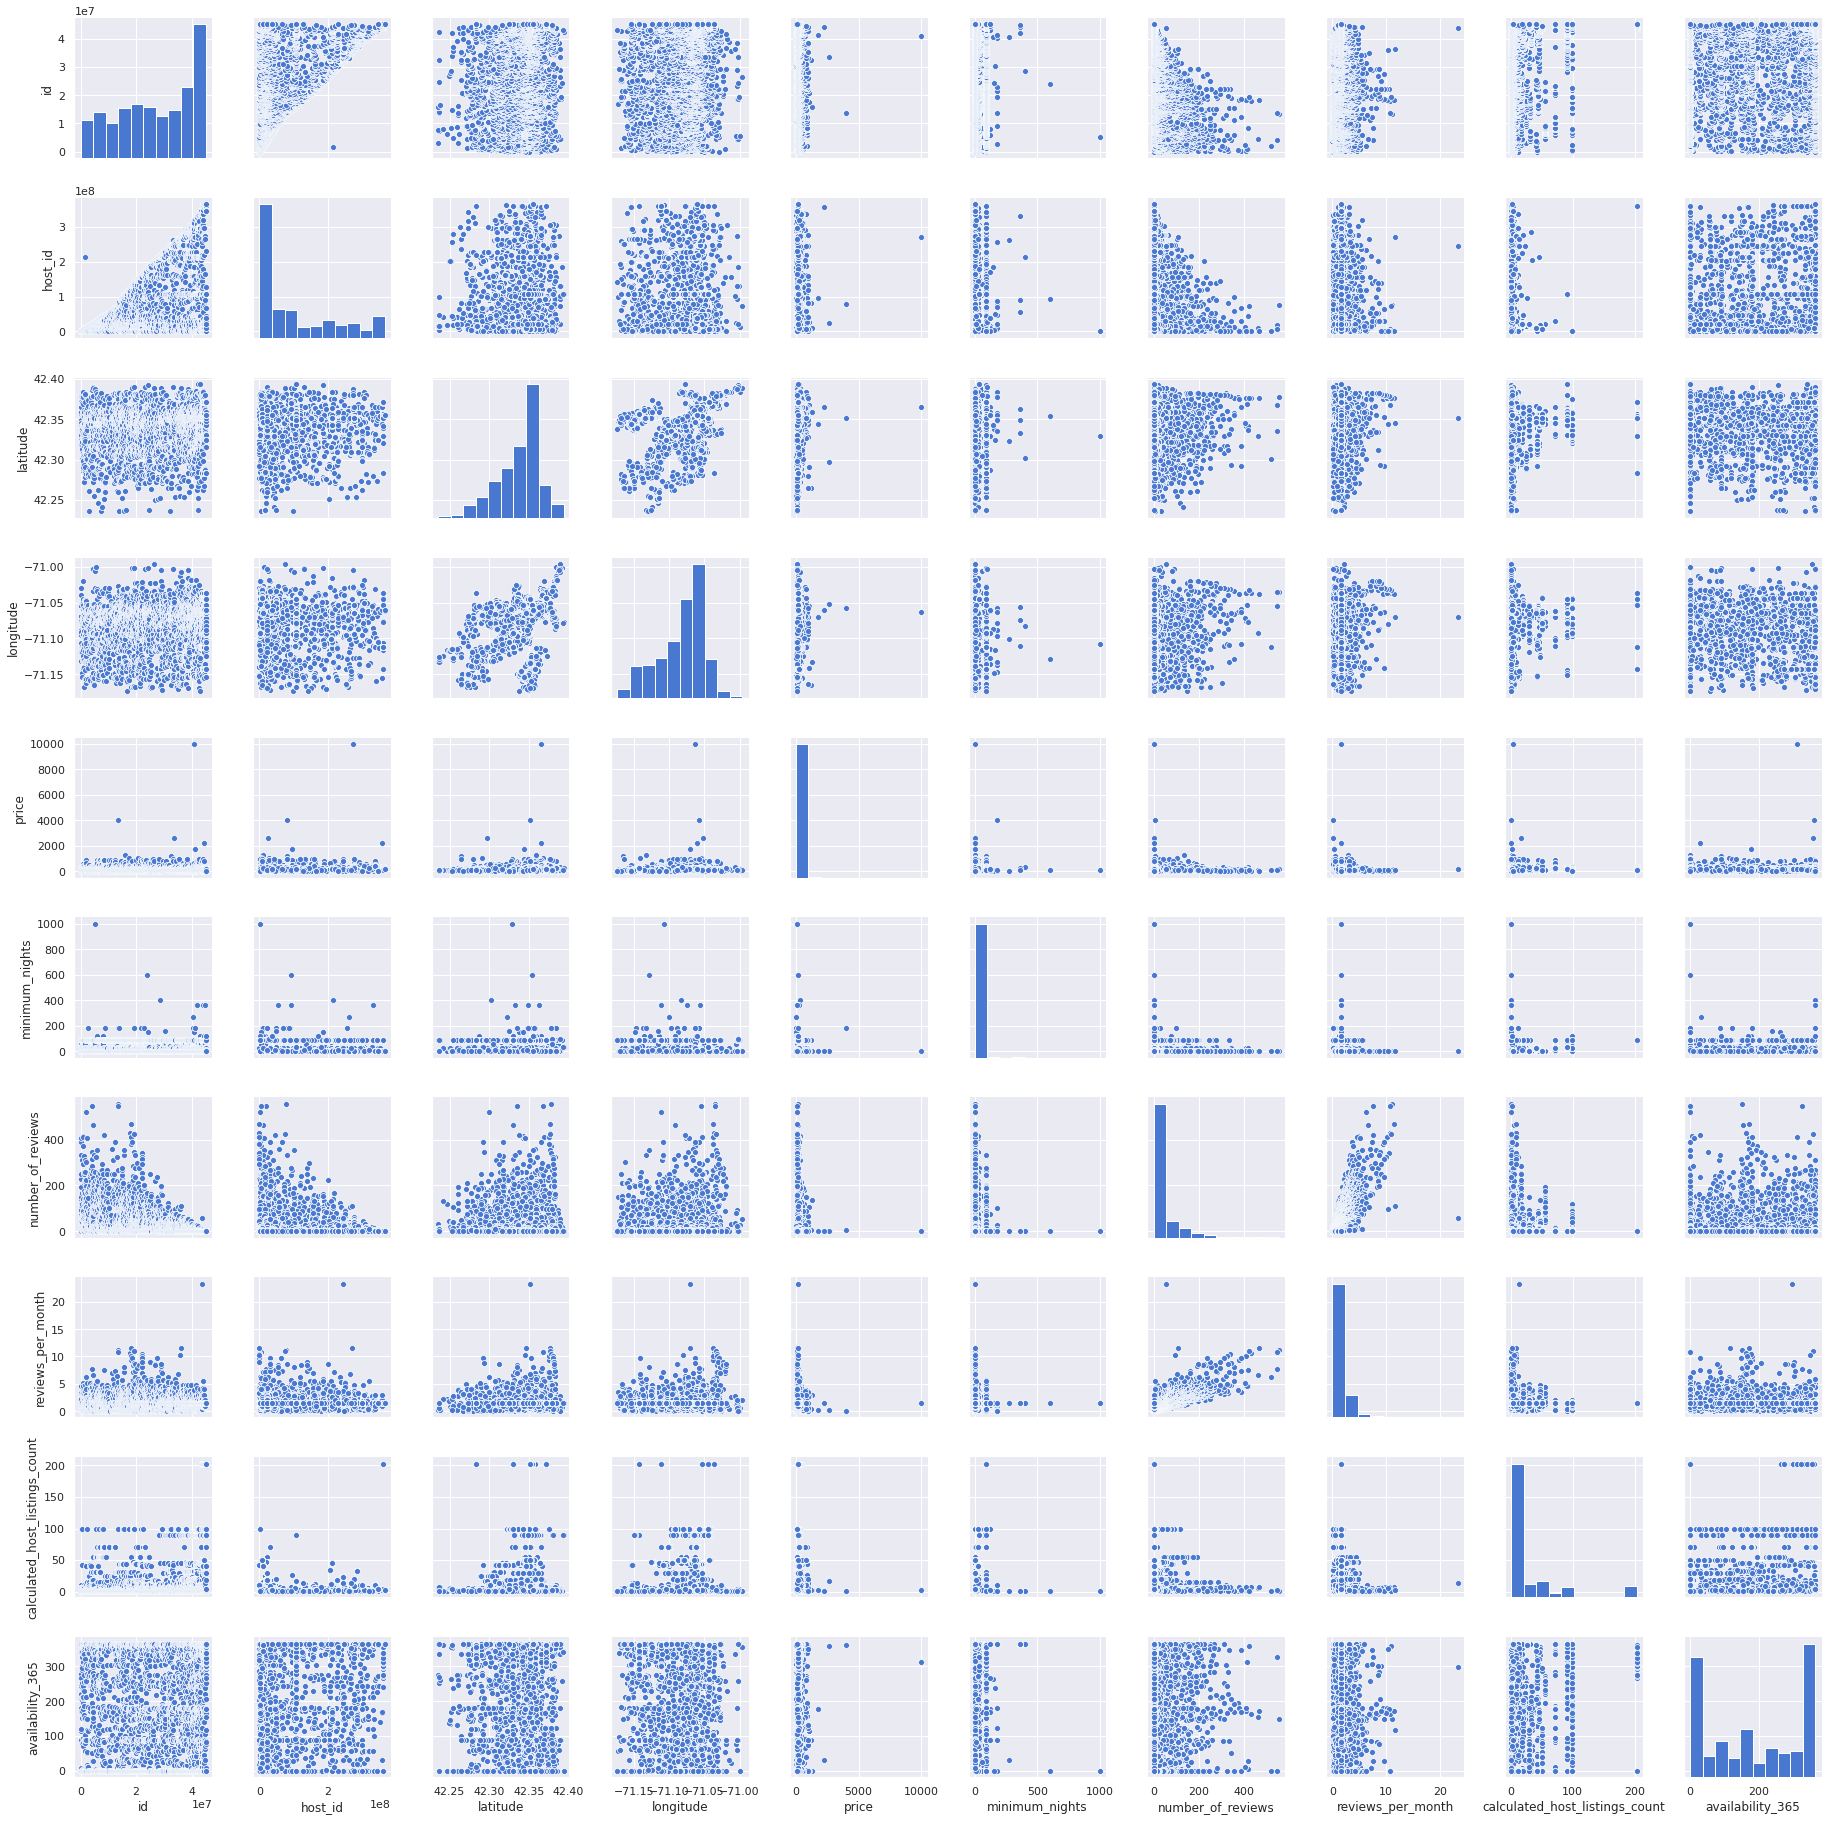

In [49]:
sns.pairplot(boston_listing_num)
plt.savefig("EDA_boston.jpg")

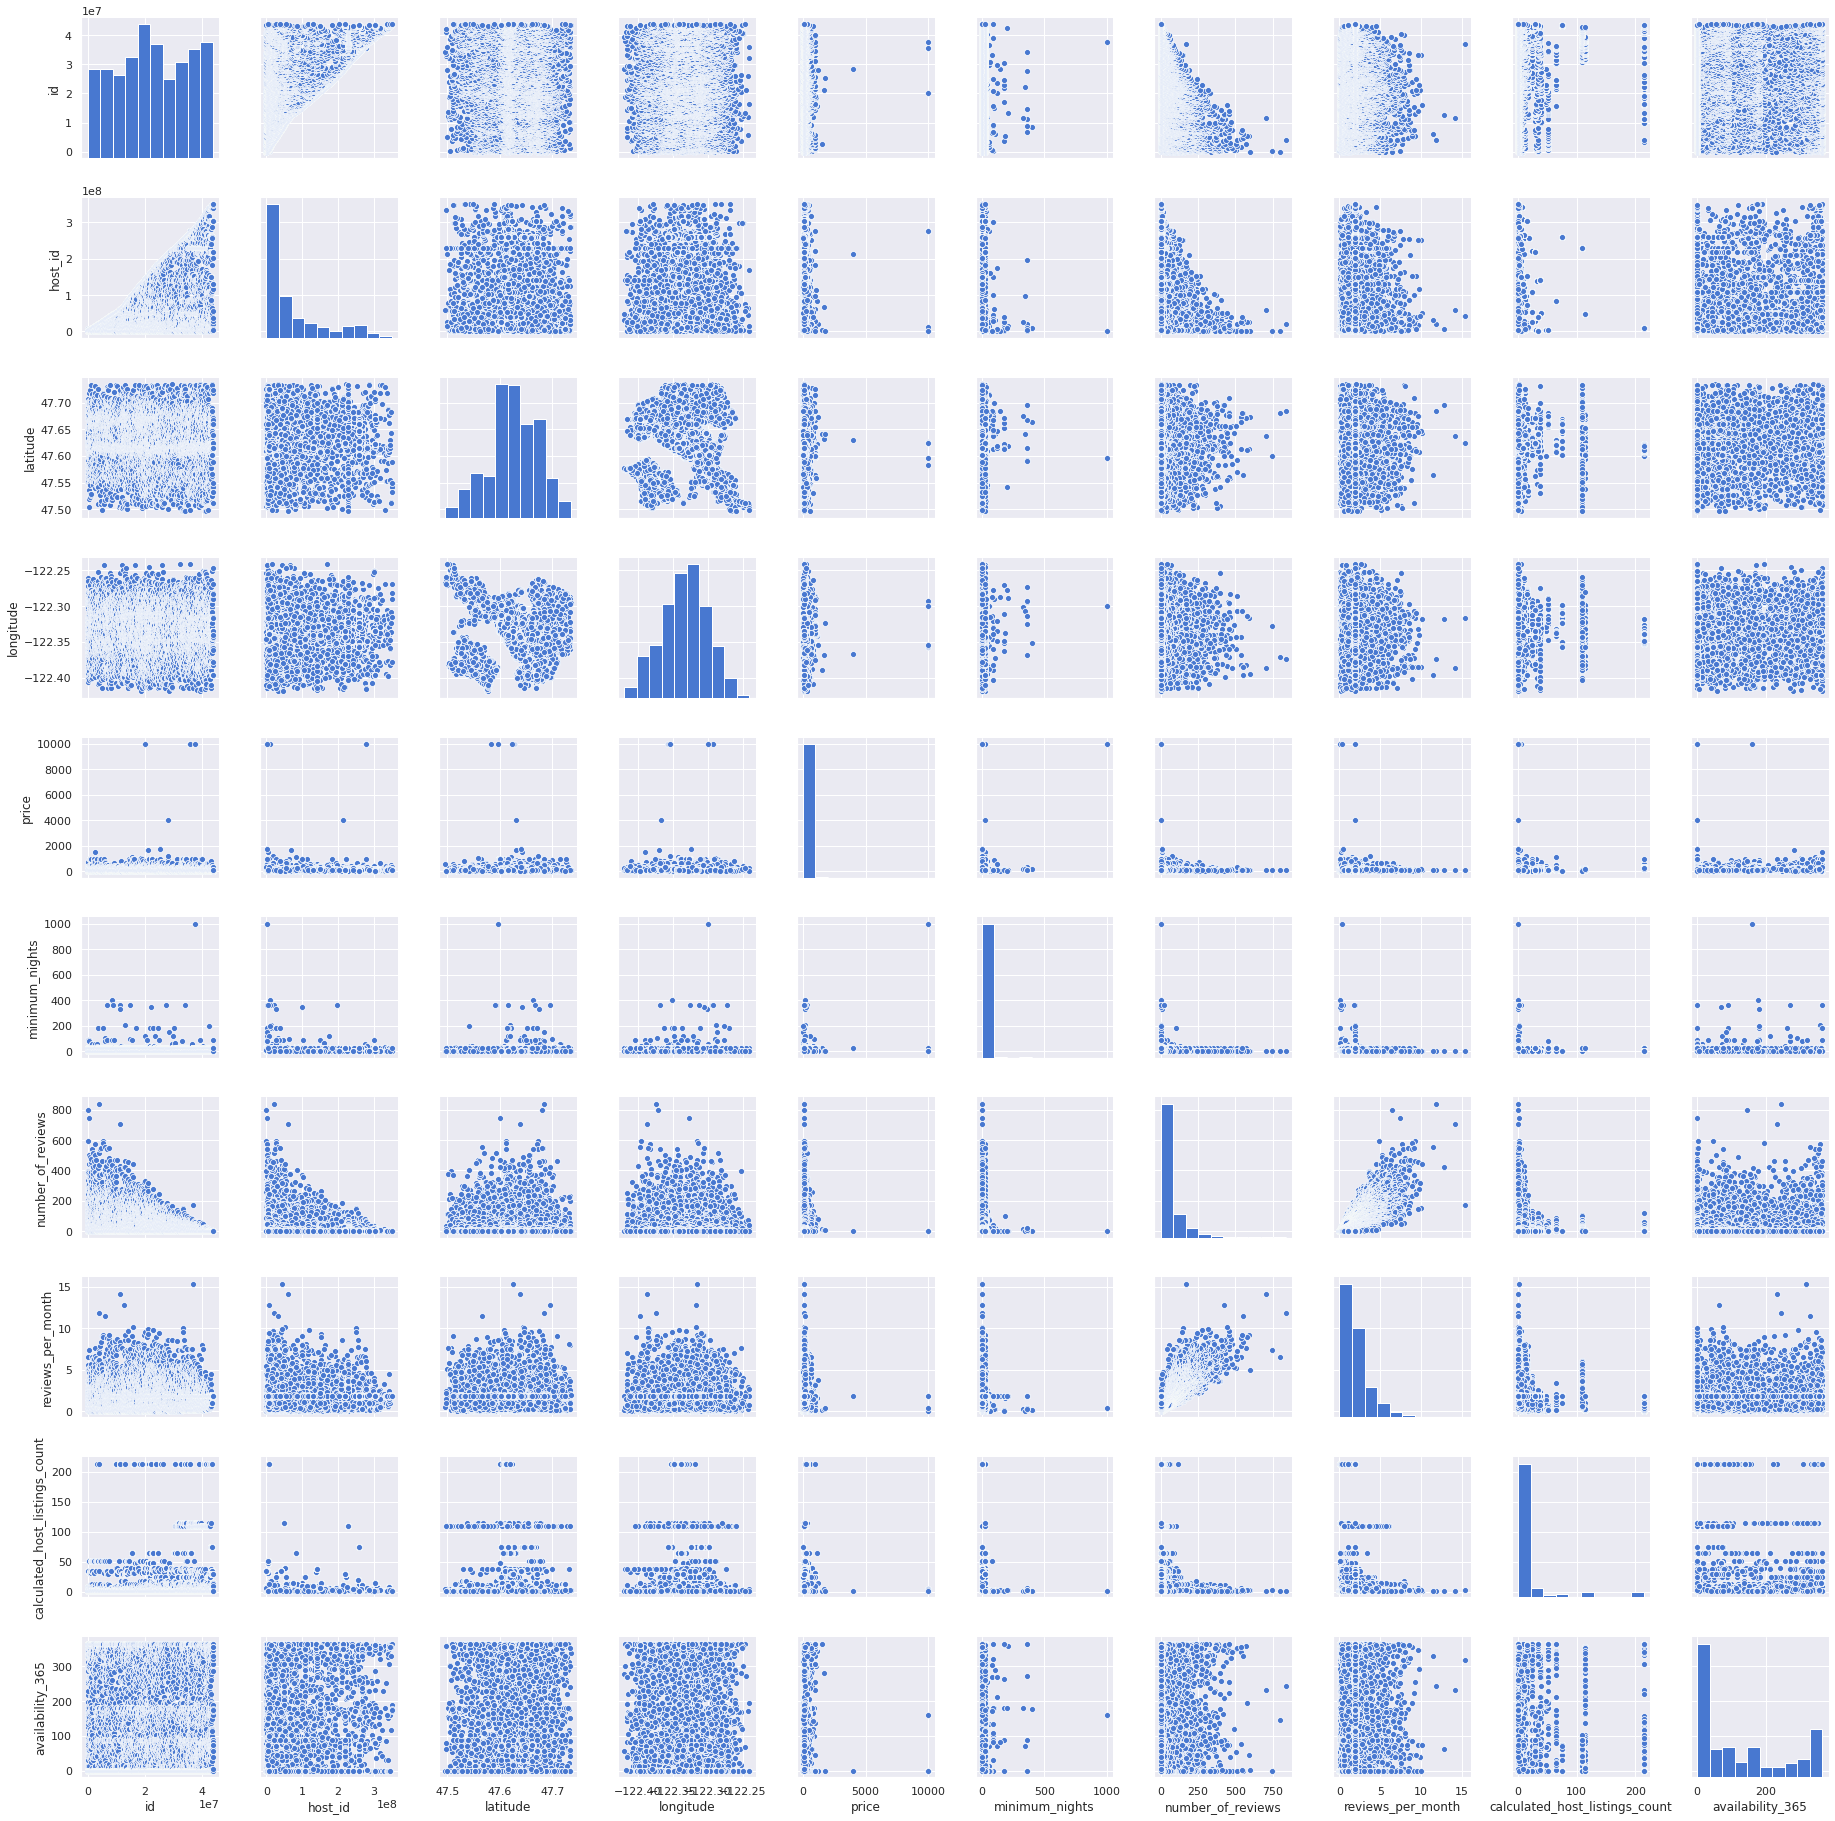

In [47]:
sns.pairplot(seattle_listing_num)
plt.savefig("EDA_seattle.jpg")

<p>Interpretation from Fig I. we observer Latitude, the Number of Listings, Longitude increases, and are broadly spread across the region. The Number of Reviews and Reviews Per Month have a positive correlation.</p>

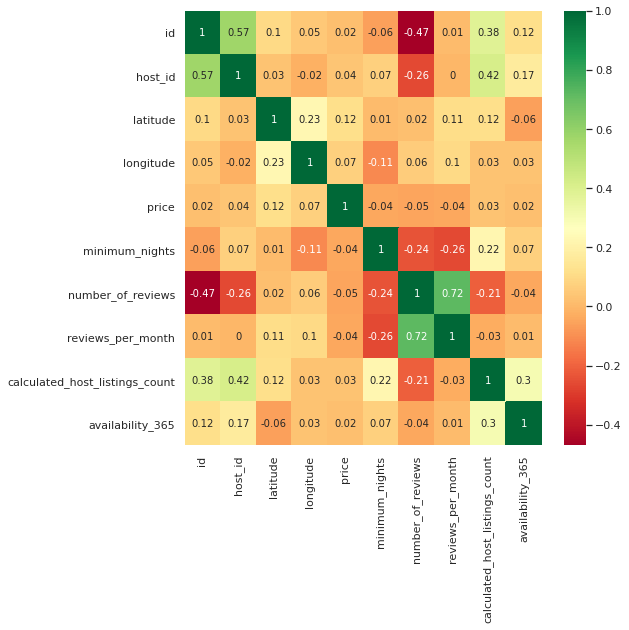

In [50]:
# HeatMaps
plt.figure(figsize=(8,8))
sns.heatmap(round(boston_listing_num.corr(),2),annot=True,cmap="RdYlGn")

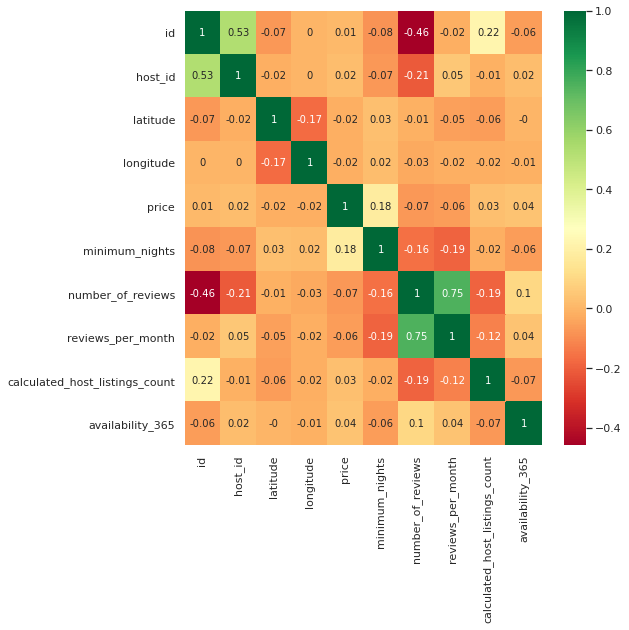

In [51]:
plt.figure(figsize=(8,8))
sns.heatmap(round(seattle_listing_num.corr(),2),annot=True,cmap="RdYlGn")

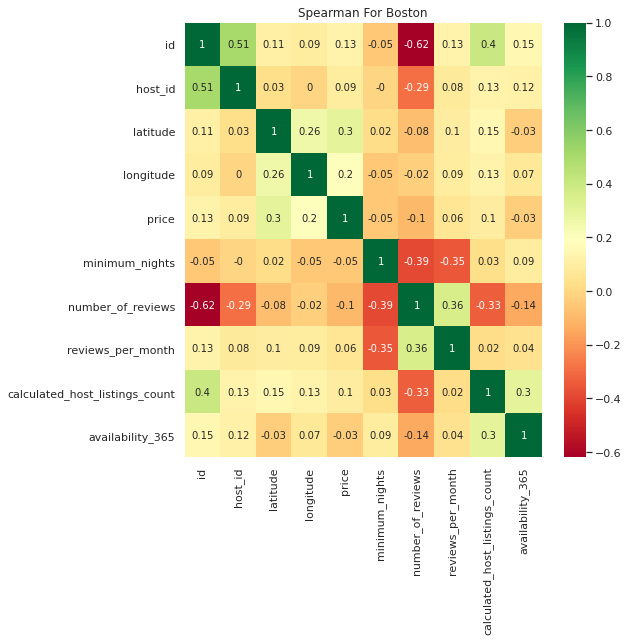

In [56]:
#Using Spearman Correalation Heatmap
plt.figure(figsize=(8,8))
sns.heatmap(round(boston_listing_num.corr(method = 'spearman'),2), annot = True,cmap="RdYlGn")
plt.title("Spearman For Boston")
plt.savefig("boston_cor.jpg")
plt.show()

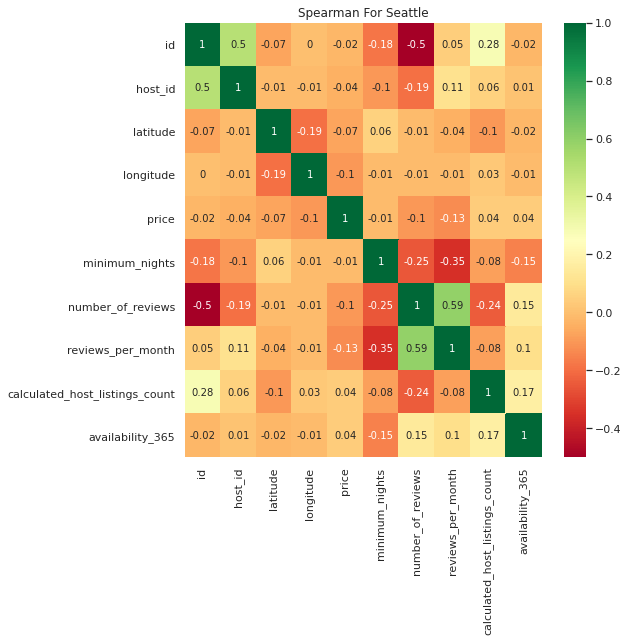

In [55]:
plt.figure(figsize=(8,8))
sns.heatmap(round(seattle_listing_num.corr(method = 'spearman'),2), annot = True,cmap="RdYlGn")
plt.title("Spearman For Seattle")
plt.savefig("seattle_corr.jpg")
plt.show()

<p>Latitude is positively correlated with the price (r=0.2) and longitude (r=0.30) for Boston whereas for Seattle it negatively correlated with the price (r=0.07) and longitude (r=0.1). The number of reviews is negatively correlated (r=0.1) for Boston and Seattle. Listing count is positively correlated for both Boston(r=0.1) and Seattle(r=0.04). Reviews per month have a positive correlation for Boston(r=0.06) compared to Seattle having a negative correlation with the price(r=0.13). Availability 365 and calculated host listings count are positively correlated (r=0.3) & (r=0.17)for Boston and Seattle respectively.</p>

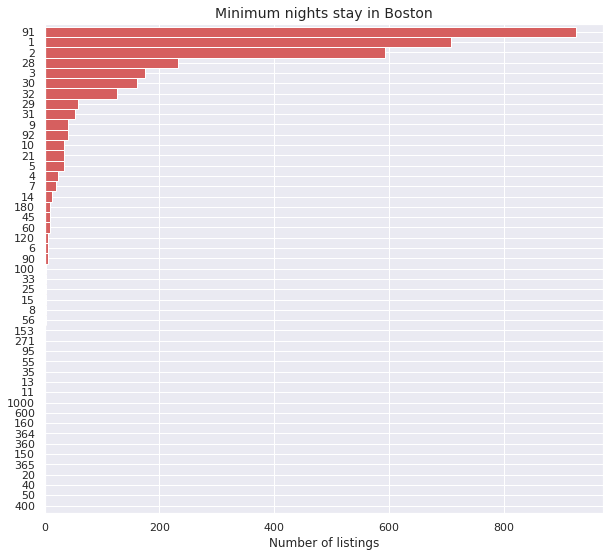

In [58]:
feq = boston_listing['minimum_nights'].value_counts().sort_values(ascending=True)[:50]
feq.plot.barh(figsize=(10,9), color ='r', width= 1)
plt.title('Minimum nights stay in Boston', fontsize=14)
plt.xlabel('Number of listings', fontsize = 12)
plt.savefig("Minimum_night_boston.jpg")
plt.show()

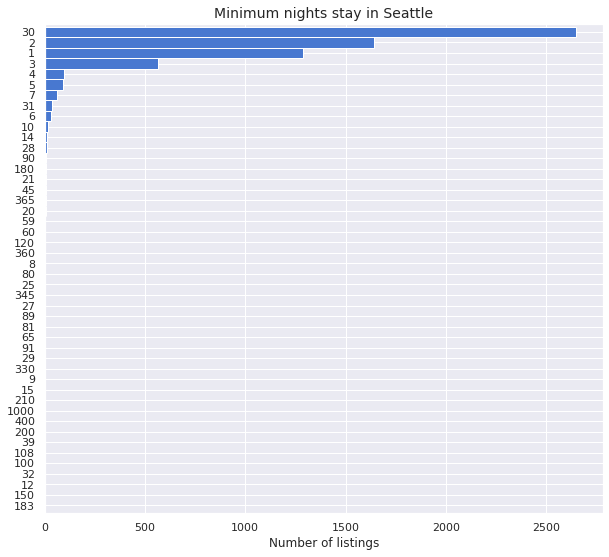

In [61]:
feq1 = seattle_listing['minimum_nights'].value_counts().sort_values(ascending=True)[:50]
feq1.plot.barh(figsize=(10,9), color ='b', width= 1)
plt.title('Minimum nights stay in Seattle', fontsize=14)
plt.xlabel('Number of listings', fontsize = 12)
plt.savefig("Minimum_night_seattle.jpg")
plt.show()

In [68]:
SEqf = feq1[2]/6575*100 #Seattle
Bosf = feq[1]/3339*100 #Boston
print("Seattle %:{},Boston%:{}".format(SEqf,Bosf))

Seattle %:24.94296577946768,Boston%:21.20395327942498


<p>Users Stayed at listing in Boston compared to Seattle where over 800 listings were occupied for 91 minimum nights in Boston while in Seattle over 2500 listings were occupied for 30 minimum nights. The percentage of occupancy for 2 minimum night for Seattle and 1 minimum night for Boston is 21%.</p>

#### Groupping by Location 

<h5>Location: latitude & longtitude.  regions of choice or regions are more likely to stay in Boston Airbnb and Seattle Airbnb</h5>

In [22]:
# Start Location 
lats = boston_listing_num['latitude']
lons = boston_listing_num['longitude']
locations = list(zip(lats, lons))
m = folium.Map(
    location=[np.mean(lats), np.mean(lons)],
    tiles='cartodbpositron',
    zoom_start=11
)

marker_cluster = MarkerCluster(
    locations=locations,
    name='Listed Rooms in Boston',
    overlay=True,
    control=True
)

marker_cluster.add_to(m)

folium.LayerControl().add_to(m)
m

In [23]:
# Start Location 
lats = seattle_listing_num['latitude']
lons = seattle_listing_num['longitude']
locations = list(zip(lats, lons))
m = folium.Map(
    location=[np.mean(lats), np.mean(lons)],
    tiles='cartodbpositron',
    zoom_start=11
)

marker_cluster = MarkerCluster(
    locations=locations,
    name='Listed Rooms in Boston',
    overlay=True,
    control=True
)
marker_cluster.add_to(m)
folium.LayerControl().add_to(m)
m

In [24]:
boston_listing['neighbourhood'].value_counts()

Dorchester                 418
Downtown                   302
Jamaica Plain              264
Brighton                   259
Roxbury                    252
Back Bay                   206
South End                  184
East Boston                183
Allston                    177
South Boston               161
Fenway                     137
Chinatown                  122
Beacon Hill                117
Charlestown                 94
North End                   71
Bay Village                 66
Roslindale                  62
Mission Hill                51
South Boston Waterfront     48
Mattapan                    47
Hyde Park                   39
West Roxbury                36
West End                    33
Longwood Medical Area        7
Leather District             3
Name: neighbourhood, dtype: int64

In [25]:
seattle_listing['neighbourhood'].value_counts()

Broadway                     383
Belltown                     345
Wallingford                  244
Central Business District    240
University District          238
                            ... 
View Ridge                    12
Roxhill                       11
South Park                     8
Holly Park                     4
Industrial District            3
Name: neighbourhood, Length: 88, dtype: int64

In [26]:
boston_listing['neighbourhood'].unique().tolist()

['East Boston',
 'Roxbury',
 'Downtown',
 'Back Bay',
 'North End',
 'Dorchester',
 'Charlestown',
 'Jamaica Plain',
 'Beacon Hill',
 'Allston',
 'South Boston',
 'South End',
 'Brighton',
 'West Roxbury',
 'Roslindale',
 'Mission Hill',
 'Bay Village',
 'South Boston Waterfront',
 'Fenway',
 'Hyde Park',
 'West End',
 'Mattapan',
 'Chinatown',
 'Longwood Medical Area',
 'Leather District']

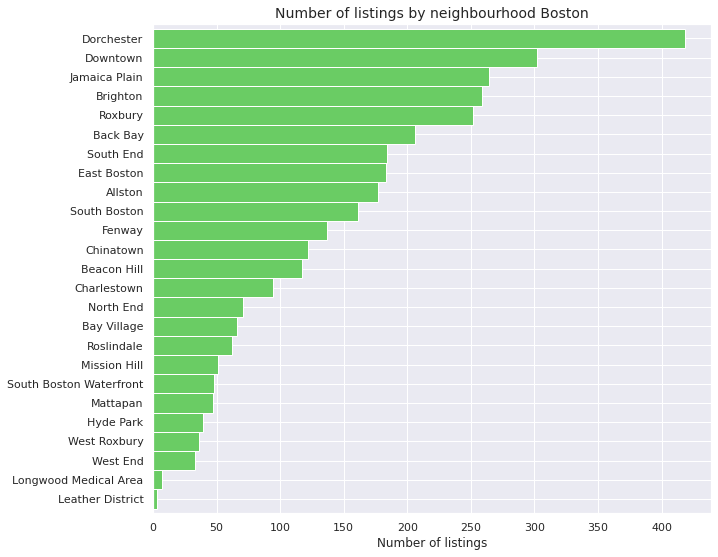

In [45]:
feq = boston_listing['neighbourhood'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10,9), color ='g', width= 1)
plt.title('Number of listings by neighbourhood Boston', fontsize=14)
plt.xlabel('Number of listings', fontsize = 12)
plt.show()

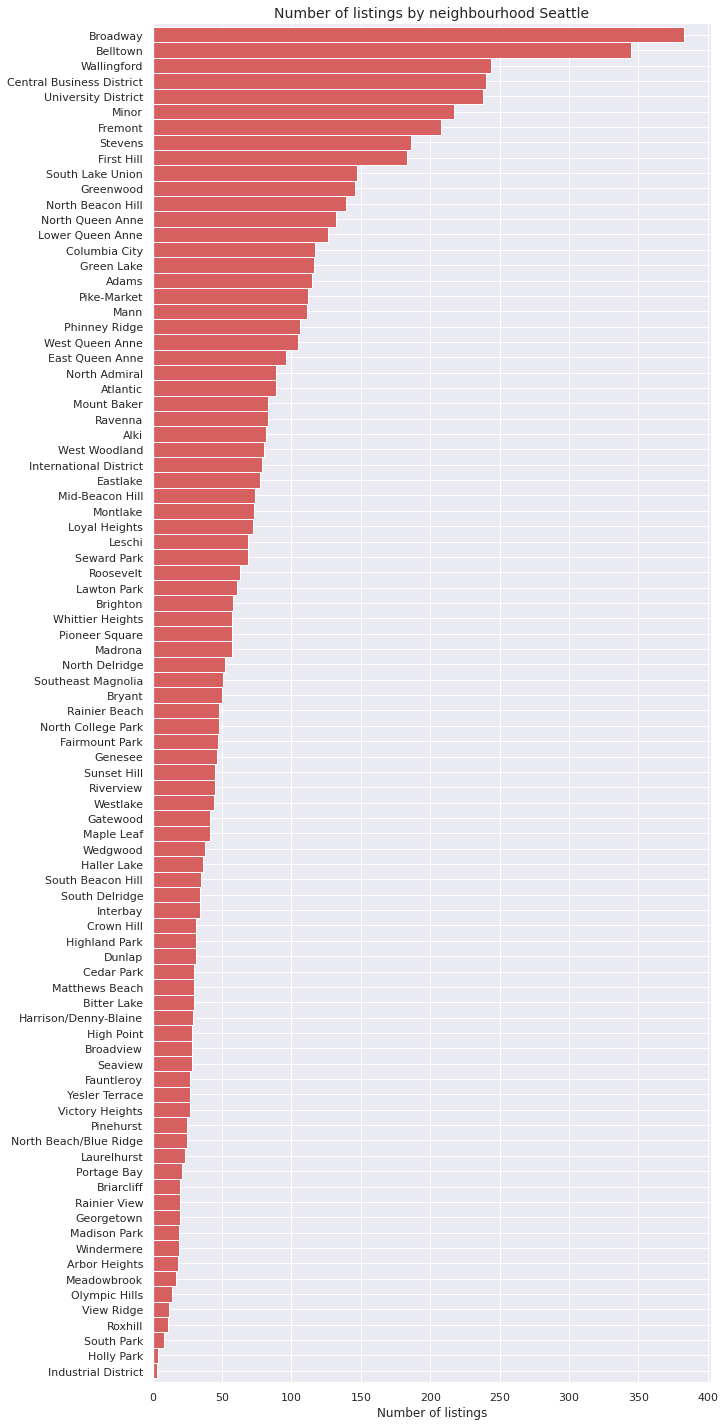

In [44]:
feq = seattle_listing['neighbourhood'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10,25), color ='r', width= 1)
plt.title('Number of listings by neighbourhood Seattle', fontsize=14)
plt.xlabel('Number of listings', fontsize = 12)
plt.show()

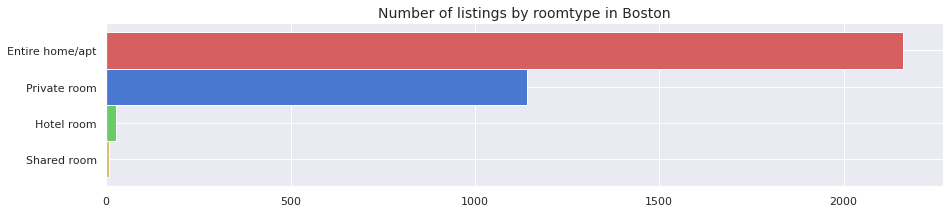

In [29]:
freq = boston_listing['room_type'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize =(15,3), width=1, color=['y','g','b','r'])
                                            #We give four different colours for our graphs
plt.title("Number of listings by roomtype in Boston", fontsize=14)
plt.show()

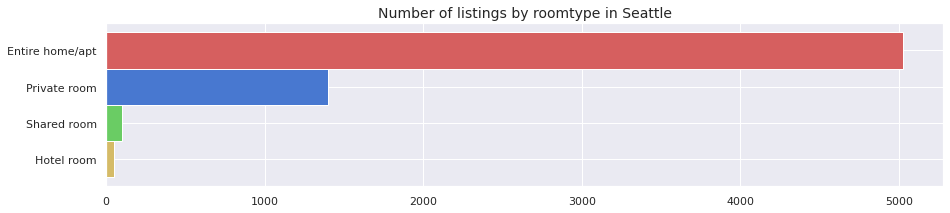

In [30]:
freq = seattle_listing['room_type'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize =(15,3), width=1, color=['y','g','b','r'])
                                            #We give four different colours for our graphs
plt.title("Number of listings by roomtype in Seattle", fontsize=14)
plt.show()

#### Popular type listing based on minimun nights

In [31]:
boston_listing.groupby(['room_type'])['minimum_nights'].mean().sort_values(ascending=False)

room_type
Shared room        80.000000
Private room       37.359019
Entire home/apt    35.176688
Hotel room          1.000000
Name: minimum_nights, dtype: float64

In [32]:
seattle_listing.groupby(['room_type'])['minimum_nights'].mean().sort_values(ascending=False)

room_type
Hotel room         26.117647
Shared room        21.639175
Private room       16.184417
Entire home/apt    14.279833
Name: minimum_nights, dtype: float64

#### Popular type of listing based on reviews

In [33]:
boston_listing.groupby(['room_type'])['number_of_reviews'].mean().sort_values(ascending=False)

room_type
Private room       38.798599
Entire home/apt    37.918594
Hotel room         18.222222
Shared room         8.875000
Name: number_of_reviews, dtype: float64

In [34]:
seattle_listing.groupby(['room_type'])['number_of_reviews'].mean().sort_values(ascending=False)

room_type
Entire home/apt    56.886834
Private room       54.956397
Hotel room         25.254902
Shared room        21.154639
Name: number_of_reviews, dtype: float64

In [35]:
summary_boston = boston_listing_num.join(boston_listing['room_type'])
summary_seattle = seattle_listing_num.join(seattle_listing['room_type'])

#### Features to influence the price in the summary dataset

In [36]:
summary_boston=pd.get_dummies(summary_boston,columns=['room_type']) 
summary_seattle = pd.get_dummies(summary_seattle,columns=['room_type'])

In [37]:
boston_listing['price'].describe(percentiles=[0.97])

count    3339.000000
mean      170.331836
std       241.431425
min         0.000000
50%       130.000000
97%       569.600000
max      9999.000000
Name: price, dtype: float64

In [38]:
seattle_listing['price'].describe(percentiles=[0.97])

count     6575.000000
mean       159.720152
std        308.683097
min          0.000000
50%        113.000000
97%        495.000000
max      10000.000000
Name: price, dtype: float64

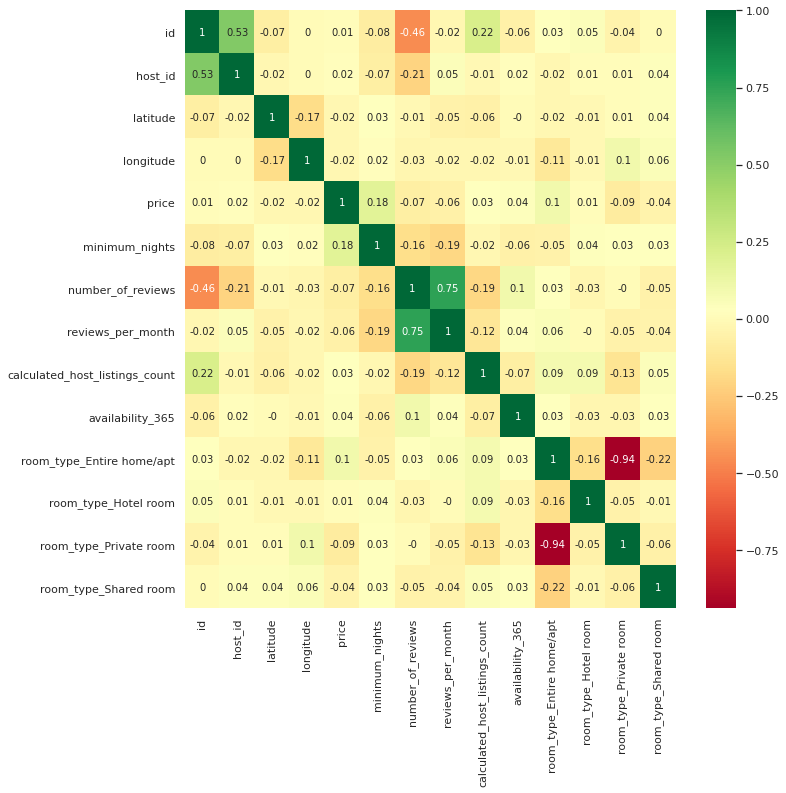

In [39]:
plt.figure(figsize=(11,11))
sns.heatmap(round(summary_seattle.corr(),2),annot=True,cmap="RdYlGn")

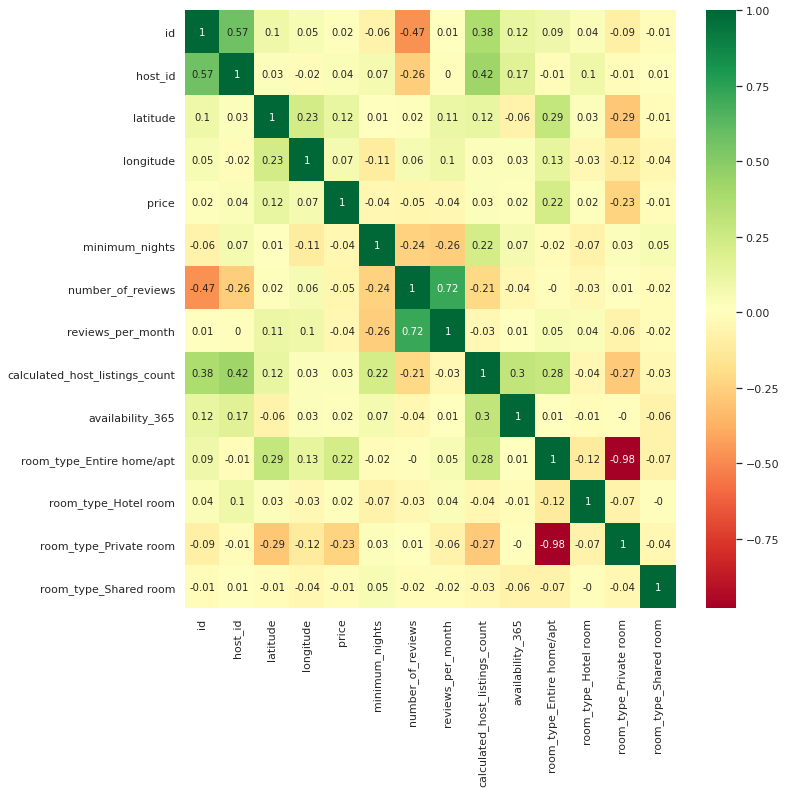

In [40]:
plt.figure(figsize=(11,11))
sns.heatmap(round(summary_boston.corr(),2),annot=True,cmap="RdYlGn")

<p>No_of_reviews,minimum_nights,no_of_listing count,location,availability and room type influence the price we conclude with the summary dataset </p>

#### For answering the questions will be using the main dataset to compaire and extarct more detailed analysis  

## Loading Datasets

In [2]:
# Reading the csv
df_boston_listings = pd.read_csv('Dataset/listings_Boston.csv')
df_seattle_listings = pd.read_csv("Dataset/listings_seattle.csv")
df_seattle_calender = pd.read_csv("Dataset/Seattle_final_calander.csv")
df_boston_calender = pd.read_csv("Dataset/Boston_final_calander.csv")
df_boston_reviews = pd.read_csv("Dataset/reviews_Boston.csv")
df_seattle_reviews = pd.read_csv("Dataset/reviews_Seattle.csv")

In [3]:
df_boston_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3339 non-null   int64  
 1   listing_url                                   3339 non-null   object 
 2   scrape_id                                     3339 non-null   int64  
 3   last_scraped                                  3339 non-null   object 
 4   name                                          3339 non-null   object 
 5   description                                   3310 non-null   object 
 6   neighborhood_overview                         2283 non-null   object 
 7   picture_url                                   3339 non-null   object 
 8   host_id                                       3339 non-null   int64  
 9   host_url                                      3339 non-null   o

In [4]:
df_boston_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126851 entries, 0 to 126850
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     126851 non-null  int64 
 1   id             126851 non-null  int64 
 2   date           126851 non-null  object
 3   reviewer_id    126851 non-null  int64 
 4   reviewer_name  126851 non-null  object
 5   comments       126757 non-null  object
dtypes: int64(3), object(3)
memory usage: 5.8+ MB


In [5]:
reviews_details_boston = pd.merge(df_boston_reviews, df_boston_listings[['id','host_id', 'host_name', 'name']], left_on="listing_id", right_on = "id", how = "left")
reviews_details_boston = reviews_details_boston[['listing_id', 'name', 'host_id', 'host_name', 'date', 'reviewer_id', 'reviewer_name', 'comments']] 
reviews_details_boston.head()

listing_id                       name  host_id host_name        date  \
0        3781  HARBORSIDE-Walk to subway     4804     Frank  2015-07-10   
1        3781  HARBORSIDE-Walk to subway     4804     Frank  2015-08-09   
2        3781  HARBORSIDE-Walk to subway     4804     Frank  2015-09-01   
3        3781  HARBORSIDE-Walk to subway     4804     Frank  2015-09-30   
4        3781  HARBORSIDE-Walk to subway     4804     Frank  2015-10-30   

   reviewer_id reviewer_name  \
0     36059247          Greg   
1     10459388           Tai   
2     12264652        Damien   
3     41426327          Mike   
4     15151513          Ivan   

                                            comments  
0  The apartment was as advertised and Frank was ...  
1  It was a pleasure to stay at Frank's place. Th...  
2  The apartment description is entirely faithful...  
3  Thoroughly enjoyed my time at Frank's home. Ha...  
4  Great value for the money! This location has e...

In [6]:
reviews_details_seattle = pd.merge(df_seattle_reviews, df_seattle_listings[['id','host_id', 'host_name', 'name']], left_on = "listing_id",right_on="id", how = "left")
reviews_details_seattle = reviews_details_seattle[['listing_id', 'name', 'host_id', 'host_name', 'date', 'reviewer_id', 'reviewer_name', 'comments']] 
reviews_details_seattle.head()

listing_id                                               name  host_id  \
0        2318  Casa Madrona - Urban Oasis 1 block from the park!     2536   
1        2318  Casa Madrona - Urban Oasis 1 block from the park!     2536   
2        2318  Casa Madrona - Urban Oasis 1 block from the park!     2536   
3        2318  Casa Madrona - Urban Oasis 1 block from the park!     2536   
4        2318  Casa Madrona - Urban Oasis 1 block from the park!     2536   

  host_name        date  reviewer_id reviewer_name  \
0     Megan  2008-09-15         2451         Kevin   
1     Megan  2017-01-10     12332845       Jessica   
2     Megan  2017-04-01      4789466          Ivan   
3     Megan  2017-04-25     55817131          Mike   
4     Megan  2017-06-18    113604590          Pete   

                                            comments  
0        1000 times better than staying at a hotel.   
1  Our family (two couples, a two year old and an...  
2  Top of the list locations we have stayed at! T...  
3  SUCH an awesome place. Very clean, quiet and s...  
4  We flew quite a distance to be at our only dau...

In [46]:
df_boston_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3339 entries, 0 to 3338
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            3339 non-null   int64  
 1   listing_url                                   3339 non-null   object 
 2   scrape_id                                     3339 non-null   int64  
 3   last_scraped                                  3339 non-null   object 
 4   name                                          3339 non-null   object 
 5   description                                   3310 non-null   object 
 6   neighborhood_overview                         2283 non-null   object 
 7   picture_url                                   3339 non-null   object 
 8   host_id                                       3339 non-null   int64  
 9   host_url                                      3339 non-null   o

In [47]:
df_seattle_listings.shape

(6575, 106)

In [48]:
#Creating the target factors that are useful for the EDA
target_columns= ["id","property_type", "accommodates", "first_review", "review_scores_value","review_scores_cleanliness", 
                 "review_scores_location","review_scores_accuracy", "review_scores_communication","review_scores_checkin",
                 "review_scores_rating", "maximum_nights", "listing_url","host_is_superhost","host_about","host_response_time",
                 "host_response_rate"]
                                                #Creating a shell of columns that we want to target 
listings_boston = pd.merge(boston_listing, df_boston_listings[target_columns],on='id', how='left')
                                                #Use merge left to merge the two listings together so that we can get the dataset  
listings_boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3339 entries, 0 to 3338
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3339 non-null   int64  
 1   host_id                         3339 non-null   int64  
 2   neighbourhood                   3339 non-null   object 
 3   latitude                        3339 non-null   float64
 4   longitude                       3339 non-null   float64
 5   room_type                       3339 non-null   object 
 6   price                           3339 non-null   int64  
 7   minimum_nights                  3339 non-null   int64  
 8   number_of_reviews               3339 non-null   int64  
 9   reviews_per_month               2467 non-null   float64
 10  calculated_host_listings_count  3339 non-null   int64  
 11  availability_365                3339 non-null   int64  
 12  property_type                   33

In [49]:
#Creating the target factors that are useful for the EDA
target_columns= ["id","property_type", "accommodates", "first_review", "review_scores_value","review_scores_cleanliness", 
                 "review_scores_location","review_scores_accuracy", "review_scores_communication","review_scores_checkin",
                 "review_scores_rating", "maximum_nights", "listing_url","host_is_superhost","host_about","host_response_time",
                 "host_response_rate", "street", "weekly_price","monthly_price", "market", ]
                                                #Creating a shell of columns that we want to target 
listings_seattle = pd.merge(seattle_listing, df_seattle_listings[target_columns], on='id', how='left')
                                                #Use merge left to merge the two listings together so that we can get the dataset  
listings_seattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6575 entries, 0 to 6574
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6575 non-null   int64  
 1   host_id                         6575 non-null   int64  
 2   neighbourhood                   6575 non-null   object 
 3   latitude                        6575 non-null   float64
 4   longitude                       6575 non-null   float64
 5   room_type                       6575 non-null   object 
 6   price                           6575 non-null   int64  
 7   minimum_nights                  6575 non-null   int64  
 8   number_of_reviews               6575 non-null   int64  
 9   reviews_per_month               5703 non-null   float64
 10  calculated_host_listings_count  6575 non-null   int64  
 11  availability_365                6575 non-null   int64  
 12  property_type                   65

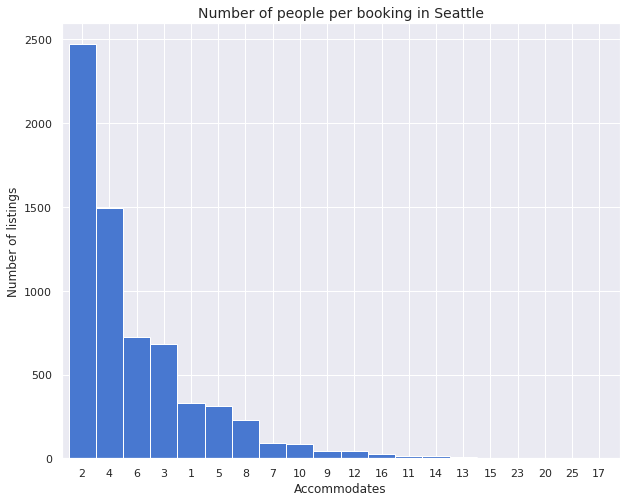

In [50]:
feq = listings_seattle['accommodates'].value_counts()
feq.plot.bar(figsize=(10,8), width=1, rot=0)
plt.title('Number of people per booking in Seattle', fontsize=14)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

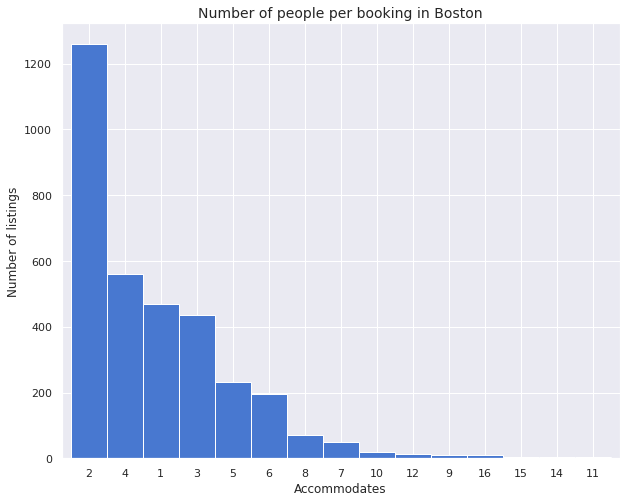

In [51]:
feq = listings_boston['accommodates'].value_counts()
feq.plot.bar(figsize=(10,8), width=1, rot=0)
plt.title('Number of people per booking in Boston', fontsize=14)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

### Property type

In [52]:
listings_boston.property_type.unique()

array(['Entire apartment', 'Entire guest suite', 'Entire condominium',
       'Room in aparthotel', 'Boat', 'Private room in house',
       'Private room in apartment', 'Entire house',
       'Private room in townhouse', 'Entire bed and breakfast',
       'Private room in condominium', 'Entire loft',
       'Private room in bed and breakfast', 'Entire townhouse',
       'Private room in bungalow', 'Entire place',
       'Private room in villa', 'Entire serviced apartment',
       'Entire guesthouse', 'Castle', 'Private room in loft',
       'Private room in guest suite', 'Shared room in apartment',
       'Houseboat', 'Shared room in condominium',
       'Private room in guesthouse', 'Private room',
       'Room in bed and breakfast', 'Shared room in house',
       'Shared room in bed and breakfast', 'Room in hotel',
       'Room in boutique hotel', 'Entire cottage',
       'Shared room in townhouse', 'Room in hostel', 'Entire villa'],
      dtype=object)

In [53]:
listings_seattle.property_type.unique()

array(['House', 'Apartment', 'Guest suite', 'Condominium', 'Guesthouse',
       'Bungalow', 'Bed and breakfast', 'Loft', 'Townhouse', 'Boat',
       'Cottage', 'Cabin', 'Houseboat', 'Other', 'Tiny house',
       'Treehouse', 'Hostel', 'Camper/RV', 'Yurt', 'Tent',
       'Serviced apartment', 'Aparthotel', 'Chalet', 'Villa',
       'Boutique hotel', 'In-law', 'Resort', 'Earth house', 'Dome house',
       'Nature lodge'], dtype=object)

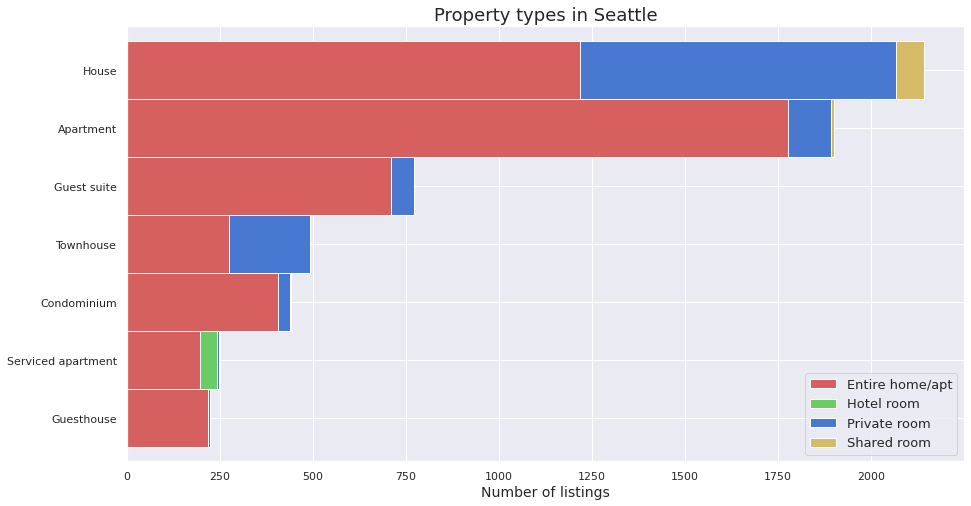

In [54]:
prop = listings_seattle.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])
prop.plot(kind='barh',stacked=True, color=['r','g','b','y'],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in Seattle', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

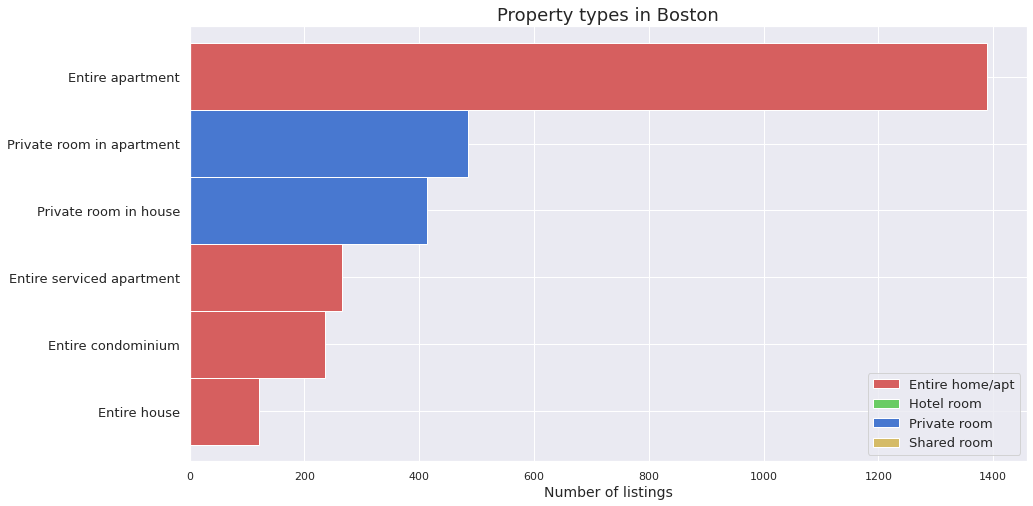

In [55]:
prop = listings_boston.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])
prop.plot(kind='barh',stacked=True, color=['r','g','b','y'],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in Boston', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

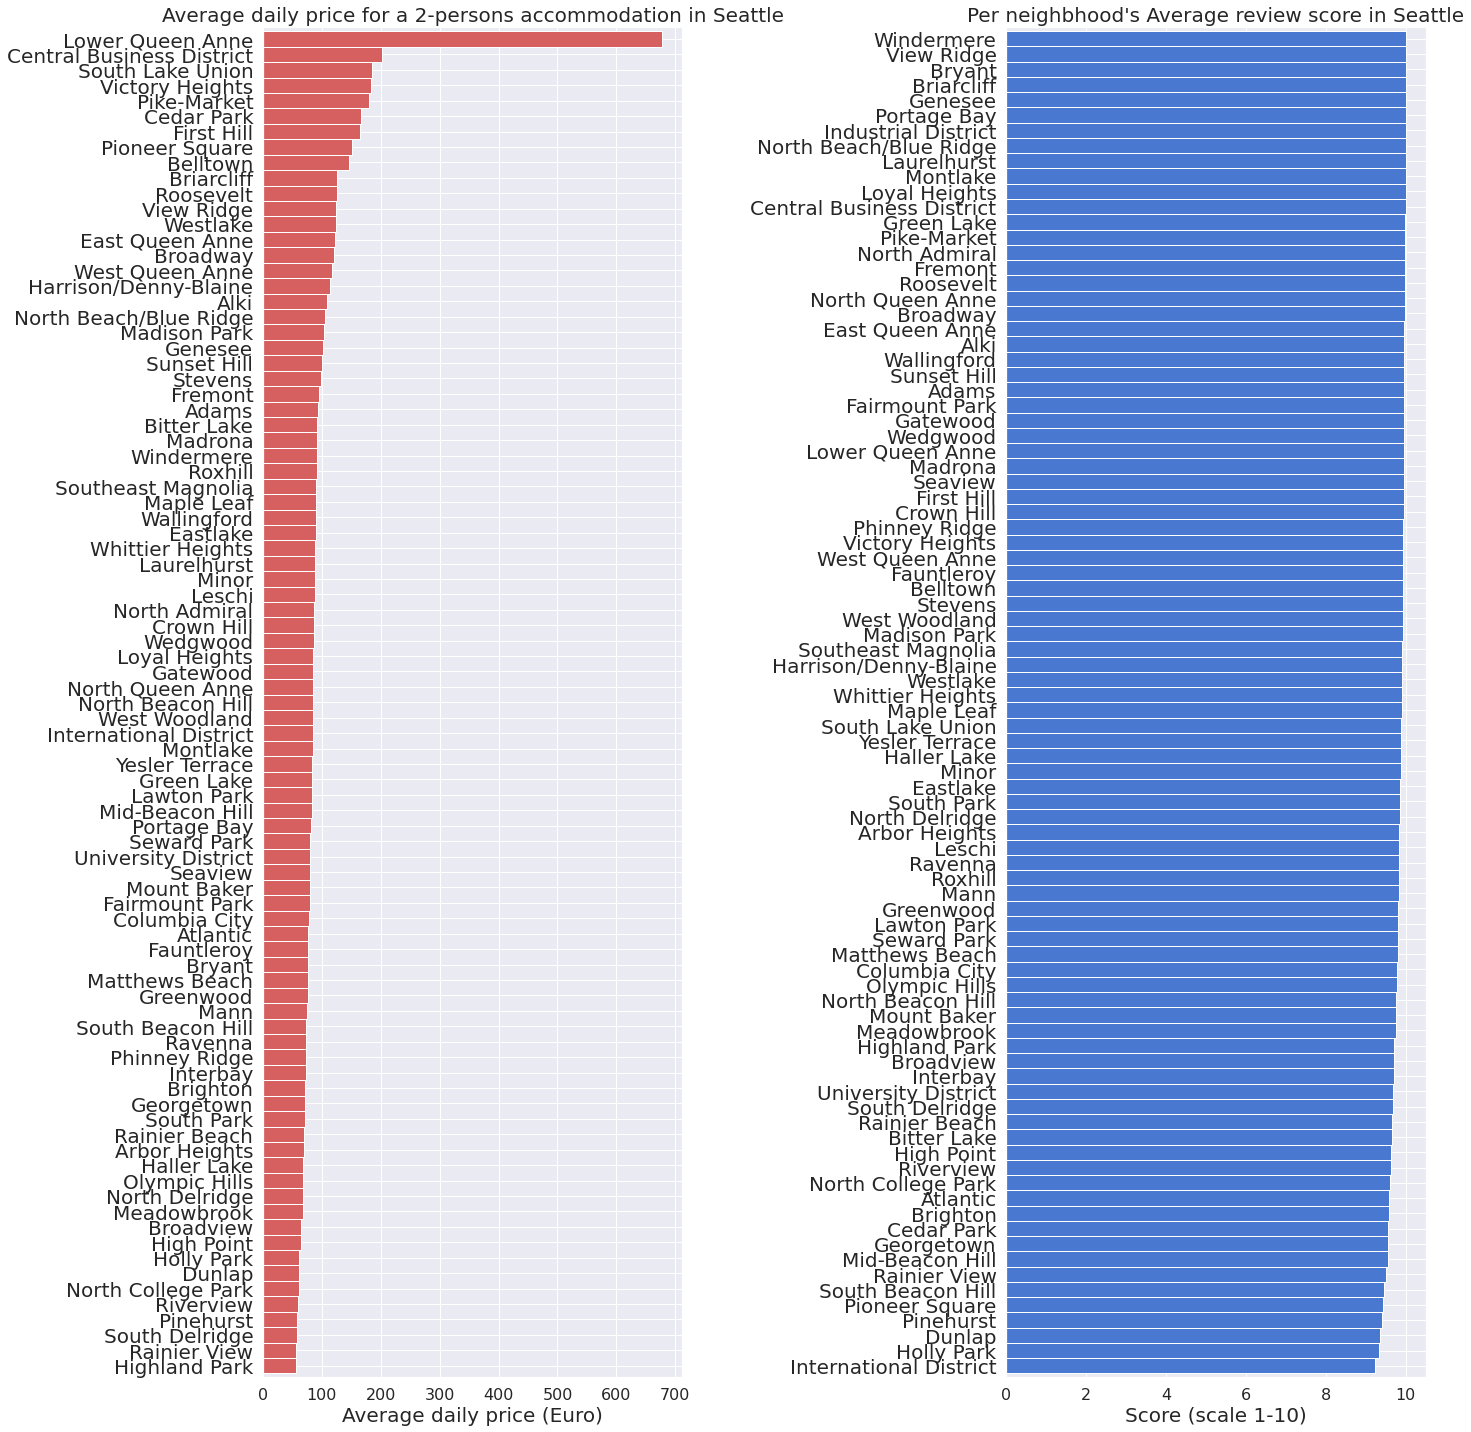

In [56]:
fig = plt.figure(figsize=(20,20))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)
ax1 = fig.add_subplot(121)
feq = listings_seattle[listings_seattle['accommodates']==2]
feq1 = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
ax1=feq1.plot.barh(color='r', width=1)
plt.title("Average daily price for a 2-persons accommodation in Seattle", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=20)
plt.ylabel("")
ax2 = fig.add_subplot(122)
feq = listings_seattle[listings_seattle['number_of_reviews']>=10]
feq2 = feq.groupby('neighbourhood')['review_scores_location'].mean().sort_values(ascending=True)
ax2=feq2.plot.barh(color='b', width=1)
plt.title("Per neighbhood's Average review score in Seattle", fontsize=20)
plt.xlabel('Score (scale 1-10)', fontsize=20)
plt.ylabel("")
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

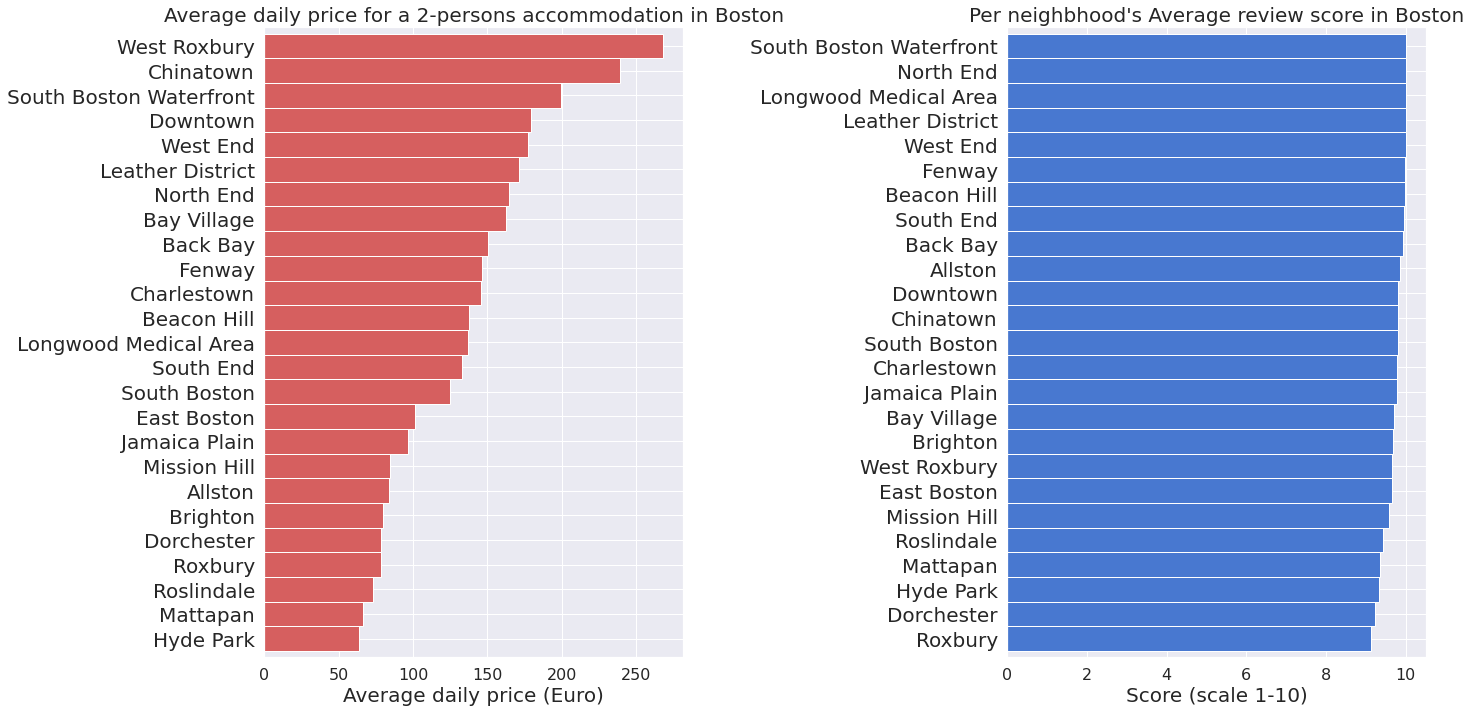

In [57]:
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)
ax1 = fig.add_subplot(121)
feq = listings_boston[listings_boston['accommodates']==2]
feq1 = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
ax1=feq1.plot.barh(color='r', width=1)
plt.title("Average daily price for a 2-persons accommodation in Boston", fontsize=20)
plt.xlabel('Average daily price (Euro)', fontsize=20)
plt.ylabel("")
ax2 = fig.add_subplot(122)
feq = listings_boston[listings_boston['number_of_reviews']>=10]
feq2 = feq.groupby('neighbourhood')['review_scores_location'].mean().sort_values(ascending=True)
ax2=feq2.plot.barh(color='b', width=1)
plt.title("Per neighbhood's Average review score in Boston", fontsize=20)
plt.xlabel('Score (scale 1-10)', fontsize=20)
plt.ylabel("")
plt.tight_layout()
plt.show

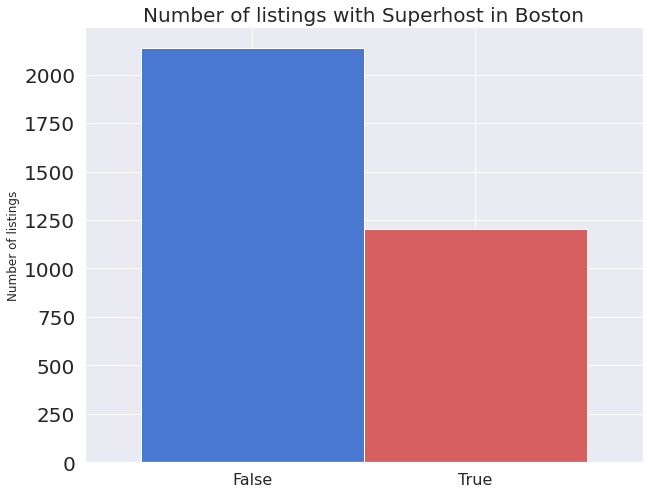

In [58]:
listings_boston.host_is_superhost = listings_boston.host_is_superhost.replace({"t": "Superhost", "f": "Not Superhost"})
                                        #Replace all the columns to replace the 't' with 'True' and 'f' with 'False'
    
feq=listings_boston['host_is_superhost'].value_counts()
feq.plot.bar(figsize=(10, 8), color=['b','r'], width=1, rot=0)
plt.title("Number of listings with Superhost in Boston", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.show()

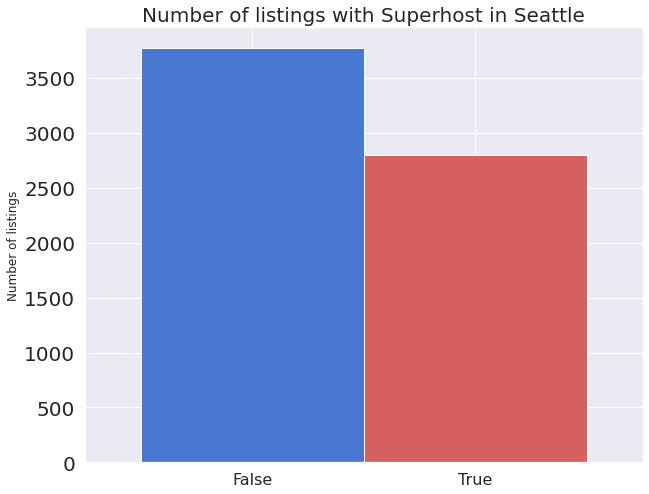

In [59]:
listings_seattle.host_is_superhost = listings_seattle.host_is_superhost.replace({"t": "Superhost", "f": "Not Superhost"})
                                        #Replace all the columns to replace the 't' with 'True' and 'f' with 'False'
    
feq=listings_seattle['host_is_superhost'].value_counts()
feq.plot.bar(figsize=(10, 8), color=['b','r'], width=1, rot=0)
plt.title("Number of listings with Superhost in Seattle", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.show()

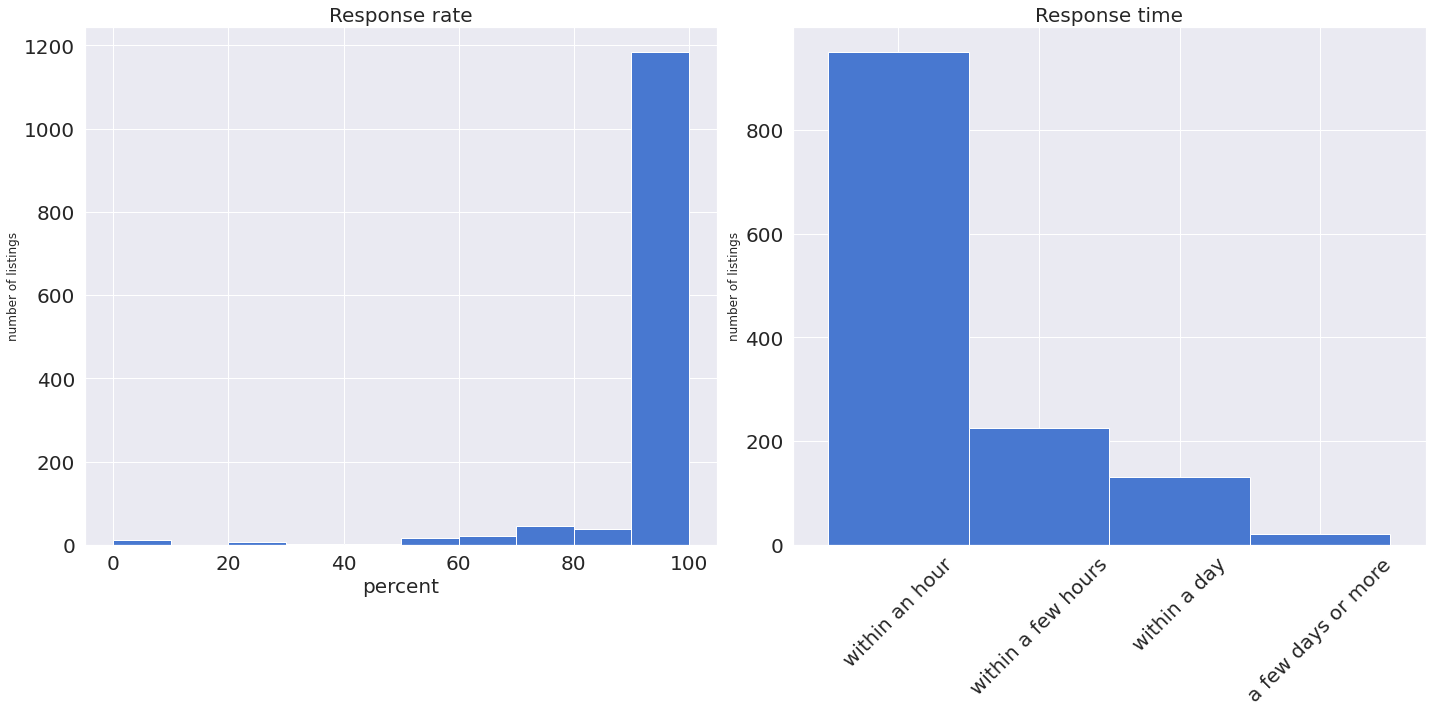

In [60]:
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

listings_boston['host_response_rate'] = listings_boston['host_response_rate'].apply(lambda col: float(str(col).replace("%", "")))
#Reponse Rate
ax1 = fig.add_subplot(121)
feq1 = listings_boston[listings_boston['number_of_reviews']>= 10]['host_response_rate'].dropna()
ax1= plt.hist(feq1)
plt.title("Response rate", fontsize=20)
plt.ylabel("number of listings")
plt.xlabel("percent", fontsize=20)

#Reponse Time
ax2 = fig.add_subplot(122)
feq2 = listings_boston[listings_boston['number_of_reviews']>= 10]['host_response_time'].value_counts()
ax2=feq2.plot.bar(color='b', width=1, rot=45)
plt.title("Response time", fontsize=20)
plt.ylabel("number of listings")

plt.tight_layout()
plt.show()

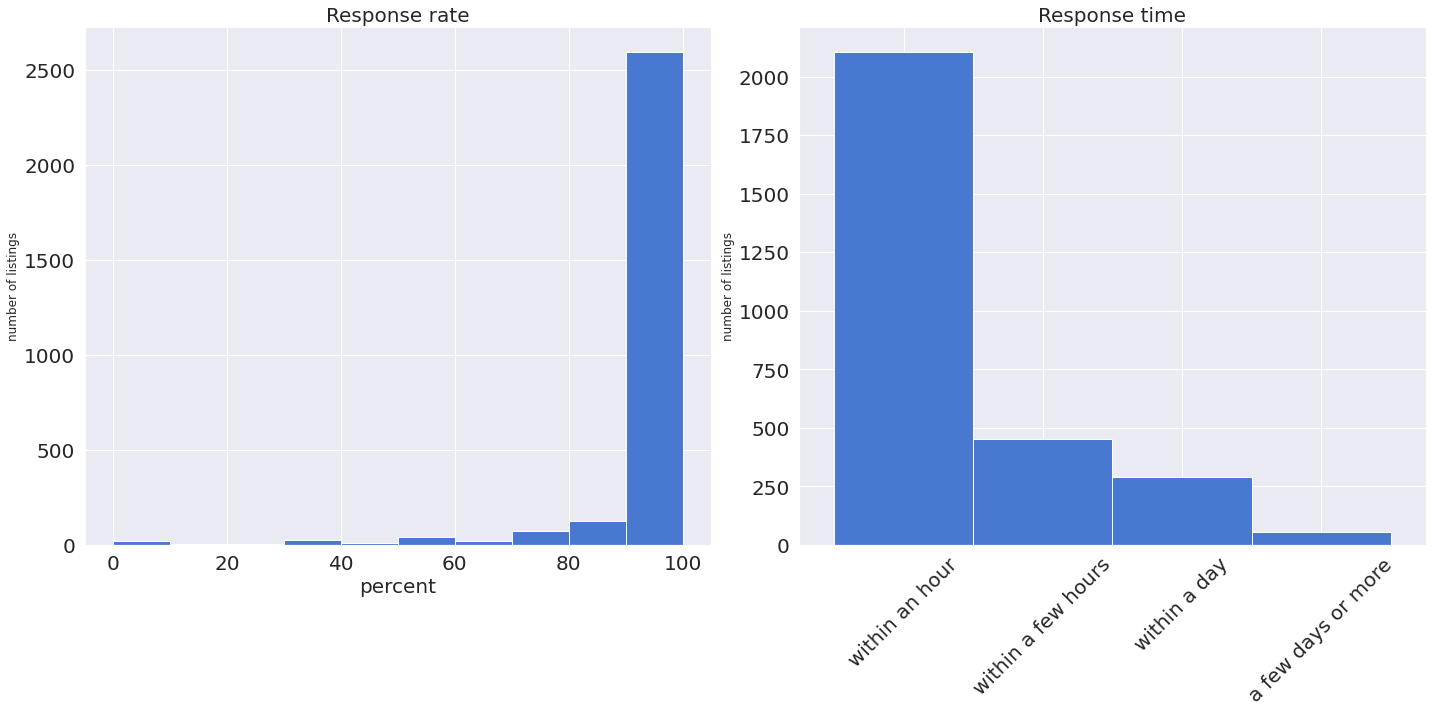

In [61]:
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

listings_seattle['host_response_rate'] = listings_seattle['host_response_rate'].apply(lambda col: float(str(col).replace("%", "")))
#Reponse Rate
ax1 = fig.add_subplot(121)
feq1 = listings_seattle[listings_seattle['number_of_reviews']>= 10]['host_response_rate'].dropna()
ax1= plt.hist(feq1)
plt.title("Response rate", fontsize=20)
plt.ylabel("number of listings")
plt.xlabel("percent", fontsize=20)

#Reponse Time
ax2 = fig.add_subplot(122)
feq2 = listings_seattle[listings_seattle['number_of_reviews']>= 10]['host_response_time'].value_counts()
ax2=feq2.plot.bar(color='b', width=1, rot=45)
plt.title("Response time", fontsize=20)
plt.ylabel("number of listings")

plt.tight_layout()
plt.show()

In [3]:
df_seattle_calender['price'] = df_seattle_calender['price'].apply(lambda col: float(str(col).replace("$", "").replace(',','')))
df_boston_calender['price'] = df_boston_calender['price'].apply(lambda col: float(str(col).replace("$", "").replace(",",'')))

In [4]:
df_seattle_calender['adjusted_price'] = df_seattle_calender['adjusted_price'].apply(lambda col: float(str(col).replace("$", "").replace(',','')))
df_boston_calender['adjusted_price'] = df_boston_calender['adjusted_price'].apply(lambda col: float(str(col).replace("$", "").replace(",",'')))

In [5]:
df_seattle_calender['available'] = df_seattle_calender['available'].apply(lambda col: 0 if col=="f" else 1)
df_boston_calender['available'] = df_boston_calender['available'].apply(lambda col: 0 if col=="f" else 1)

In [6]:
df_seattle_calender['date'] = pd.to_datetime(df_seattle_calender['date'])
df_boston_calender['date'] = pd.to_datetime(df_boston_calender['date'])

In [7]:
df_seattle_calender = df_seattle_calender.iloc[:,[1,3]]
df_boston_calender = df_boston_calender.iloc[:,[1,3]]

In [8]:
df_seattle_calender.set_index(df_seattle_calender['date'],inplace=True)
df_boston_calender.set_index(df_boston_calender['date'],inplace=True)

In [9]:
mask1 = (df_seattle_calender['date']>='2019-08-1') & (df_seattle_calender['date'] <= '2020-10-01')
mask2 = (df_boston_calender['date']>='2019-08-1') & (df_boston_calender['date'] <= '2020-10-01')
df_seattle_calender= df_seattle_calender.loc[mask1]
df_boston_calender = df_boston_calender.loc[mask2]

In [10]:
df_boston_calender['location'] = "Boston"
df_seattle_calender['location'] = "Seattle"
calander = pd.concat([df_boston_calender,df_seattle_calender])

In [11]:
calander.shape

(13377912, 3)

In [12]:
del df_boston_calender
del df_seattle_calender
gc.collect()

100

In [13]:
calander

date  price location
date                                 
2019-10-19 2019-10-19  185.0   Boston
2019-10-19 2019-10-19  150.0   Boston
2019-10-20 2019-10-20  125.0   Boston
2019-10-21 2019-10-21  125.0   Boston
2019-10-22 2019-10-22  125.0   Boston
...               ...    ...      ...
2020-09-27 2020-09-27   25.0  Seattle
2020-09-28 2020-09-28   25.0  Seattle
2020-09-29 2020-09-29   25.0  Seattle
2020-09-30 2020-09-30   25.0  Seattle
2020-10-01 2020-10-01   25.0  Seattle

[13377912 rows x 3 columns]

In [14]:
per = calander.date.dt.to_period("M") 

In [15]:
g = calander.groupby([per,calander["location"]])

In [16]:
final = g.median().reset_index()

In [17]:
final['date'] = final['date'].dt.strftime('%Y-%m')

In [18]:
final

date location  price
0   2019-09   Boston  147.0
1   2019-09  Seattle  115.0
2   2019-10   Boston  150.0
3   2019-10  Seattle  112.0
4   2019-11   Boston  140.0
5   2019-11  Seattle  110.0
6   2019-12   Boston  125.0
7   2019-12  Seattle  113.0
8   2020-01   Boston  120.0
9   2020-01  Seattle  107.0
10  2020-02   Boston  125.0
11  2020-02  Seattle  109.0
12  2020-03   Boston  143.0
13  2020-03  Seattle  115.0
14  2020-04   Boston  149.0
15  2020-04  Seattle  119.0
16  2020-05   Boston  150.0
17  2020-05  Seattle  124.0
18  2020-06   Boston  155.0
19  2020-06  Seattle  125.0
20  2020-07   Boston  160.0
21  2020-07  Seattle  129.0
22  2020-08   Boston  160.0
23  2020-08  Seattle  131.0
24  2020-09   Boston  158.0
25  2020-09  Seattle  129.0
26  2020-10   Boston  150.0
27  2020-10  Seattle  123.0

Text(0.5, 1.0, 'Median Price Trend From 2019 OCT to 2020 OCT')

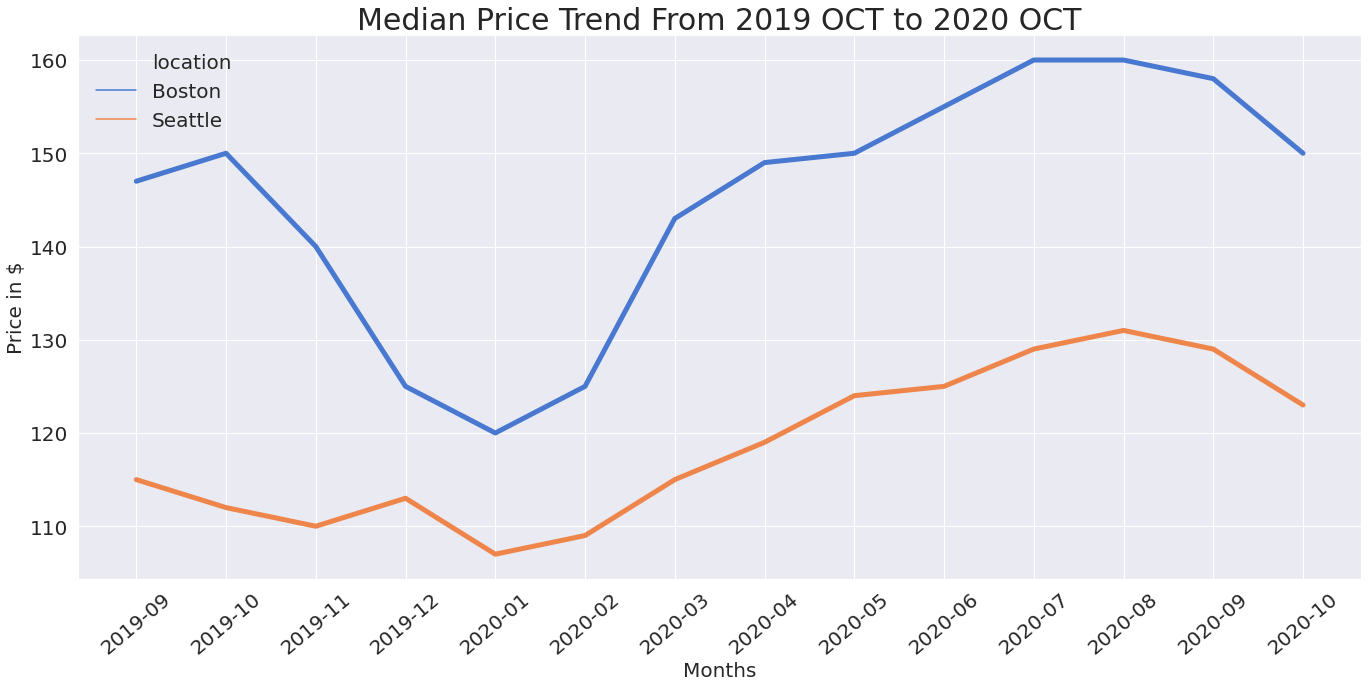

In [19]:
fig = plt.figure(figsize=(23,10))
sns.lineplot(data=final, x="date", y="price",hue="location", linewidth=5)
plt.xticks(rotation=40,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Months",fontsize=20)
plt.ylabel("Price in $",fontsize=20)
plt.legend(loc='upper left',frameon=False,fontsize=20)
plt.title("Median Price Trend From 2019 OCT to 2020 OCT",fontsize=30)

In [20]:
cols_with_missing_val_seattle = list(set(df_seattle_listings.columns[df_seattle_listings.isnull().mean()>0.750]))
cols_with_missing_val_boston = list(set(df_boston_listings.columns[df_boston_listings.isnull().mean()>0.750]))

In [21]:
df_boston_listings.drop(columns =cols_with_missing_val_boston , inplace = True, axis = 1)
df_seattle_listings.drop(columns =cols_with_missing_val_seattle , inplace = True, axis = 1)

In [22]:
df_boston_listings[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','review_scores_rating']].describe()

review_scores_rating  review_scores_accuracy  \
count           2449.000000             2447.000000   
mean              93.681094                9.616265   
std                8.467207                0.834819   
min               20.000000                2.000000   
25%               92.000000                9.000000   
50%               96.000000               10.000000   
75%               99.000000               10.000000   
max              100.000000               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count                2448.000000            2446.000000   
mean                    9.498366               9.757972   
std                     0.911264               0.751473   
min                     2.000000               2.000000   
25%                     9.000000              10.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       review_scores_communication  review_scores_location  \
count                  2449.000000             2447.000000   
mean                      9.712127                9.597058   
std                       0.769106                0.772773   
min                       2.000000                2.000000   
25%                      10.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value  review_scores_rating  
count          2447.000000           2449.000000  
mean              9.292195             93.681094  
std               0.950552              8.467207  
min               2.000000             20.000000  
25%               9.000000             92.000000  
50%               9.000000             96.000000  
75%              10.000000             99.000000  
max              10.000000            100.000000

In [23]:
df_seattle_listings[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','review_scores_rating']].describe()

review_scores_rating  review_scores_accuracy  \
count           5658.000000             5638.000000   
mean              95.495935                9.759489   
std                6.921699                0.664606   
min               20.000000                2.000000   
25%               94.000000               10.000000   
50%               97.000000               10.000000   
75%               99.000000               10.000000   
max              100.000000               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count                5638.000000            5639.000000   
mean                    9.658212               9.829048   
std                     0.737786               0.615975   
min                     2.000000               2.000000   
25%                     9.000000              10.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       review_scores_communication  review_scores_location  \
count                  5640.000000             5639.000000   
mean                      9.828191                9.826742   
std                       0.617548                0.519866   
min                       2.000000                2.000000   
25%                      10.000000               10.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value  review_scores_rating  
count          5640.000000           5658.000000  
mean              9.551418             95.495935  
std               0.757429              6.921699  
min               2.000000             20.000000  
25%               9.000000             94.000000  
50%              10.000000             97.000000  
75%              10.000000             99.000000  
max              10.000000            100.000000

In [24]:
def clean_price(x):
    """
    clean the price column by eliminate the $ and , 
    from the string and return a float to be stored in the column
    """
    try:
        if ',' in x:
            x = x.replace(',','').replace('$','')
        x = x[1:]
        return float(str(x))
    except:
        return x

In [25]:
df_boston_listings.price = df_boston_listings.price.apply(lambda x: clean_price(x))
df_seattle_listings.price = df_seattle_listings.price.apply(lambda x: clean_price(x))
df_seattle_listings.extra_people = df_seattle_listings.extra_people.apply(lambda x: clean_price(x))
df_seattle_listings.security_deposit = df_seattle_listings.security_deposit.apply(lambda x: clean_price(x))
df_seattle_listings.cleaning_fee = df_seattle_listings.cleaning_fee.apply(lambda x: clean_price(x))

In [26]:
def fillna_spl(df,i):
    df[i].fillna(np.mean(df[i]),inplace=True)
    return df

In [34]:
boston_num_cols=boston_listing.select_dtypes(include=['float64','int64']).columns
seattle_num_cols = seattle_listing.select_dtypes(include=['float64','int64']).columns
not_wanted = ['id','host_id','latitude','longitude']
for i in boston_num_cols:
    if i in not_wanted:
        pass
    else:
        df_boston_listings = fillna_spl(df_boston_listings,i)
for i in seattle_num_cols:
    if i in not_wanted:
        pass
    else:
        df_seattle_listings = fillna_spl(df_seattle_listings,i)

Text(0.5, 0.98, 'Property Price in Seattle, according to property type')

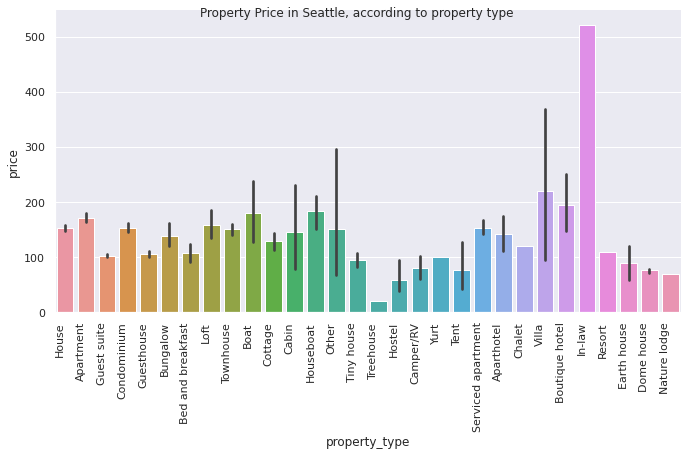

In [35]:
cpsl=sns.catplot(x='property_type', y='price', kind ='bar', data=df_seattle_listings, aspect=2) 
cpsl.set_xticklabels(rotation=90, horizontalalignment='right')
cpsl.fig.suptitle("Property Price in Seattle, according to property type")

Text(0.5, 0.98, 'Property Price in Boston, according to property type')

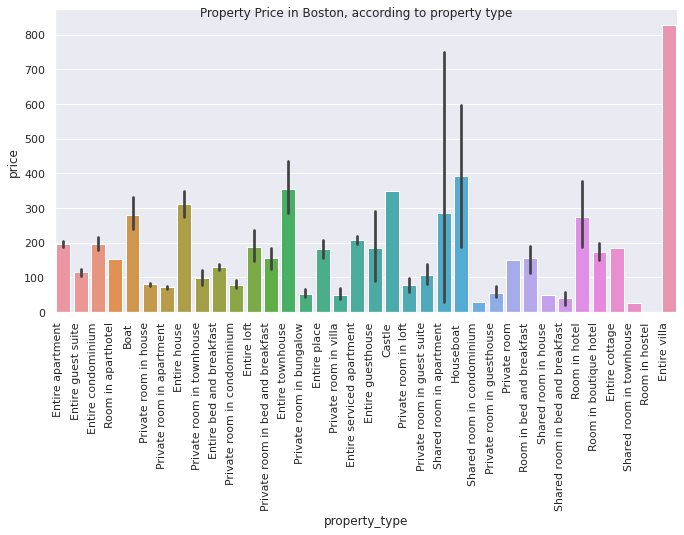

In [36]:
cpwl=sns.catplot(x='property_type', y='price', kind ='bar', data=df_boston_listings, aspect=2)
                                    #aspect: increase the width of your graph 
cpwl.set_xticklabels(rotation=90, horizontalalignment='right')
                                    #rotation: the rotation of the vaues (House, Guesthouse,etc.)
cpwl.fig.suptitle("Property Price in Boston, according to property type")

Text(0.5, 1.1, 'Relationship with bedrooms & accomodates, Seattle')

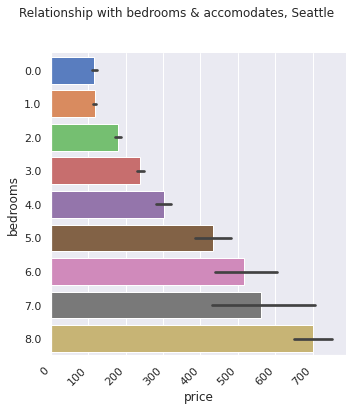

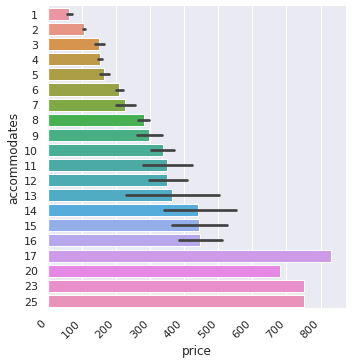

In [37]:
cbsl3 =sns.catplot (x='price', y='bedrooms', orient ='h', kind ='bar', data= df_seattle_listings)
cbsl4 =sns.catplot (x='price', y='accommodates', orient ='h', kind ='bar', data= df_seattle_listings)

cbsl3.set_xticklabels(rotation =45, horizontalalignment='right')
cbsl4.set_xticklabels(rotation =45, horizontalalignment='right')

cbsl3.fig.suptitle("\n".join(["Relationship with bedrooms & accomodates, Seattle"]), y=1.1)

Text(0.5, 1.1, 'Relationship with bedrooms & accomodates, Boston')

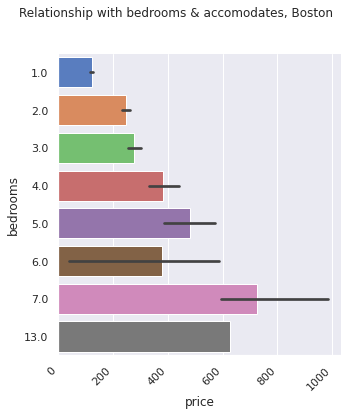

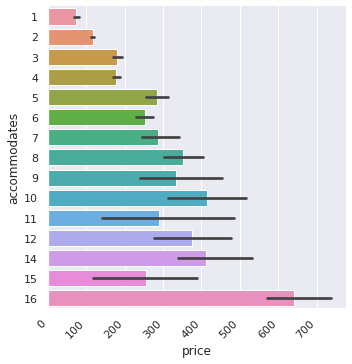

In [38]:
cbsl3 =sns.catplot (x='price', y='bedrooms', orient ='h', kind ='bar', data= df_boston_listings)
cbsl4 =sns.catplot (x='price', y='accommodates', orient ='h', kind ='bar', data= df_boston_listings)

cbsl3.set_xticklabels(rotation =45, horizontalalignment='right')
cbsl4.set_xticklabels(rotation =45, horizontalalignment='right')

cbsl3.fig.suptitle("\n".join(["Relationship with bedrooms & accomodates, Boston"]), y=1.1)

In [39]:
seattle_d= pd.get_dummies(df_seattle_listings, columns=['host_response_time',
                        'host_has_profile_pic', 
                        'host_identity_verified', 
                        'host_is_superhost', 
                        'instant_bookable', 
                        'cancellation_policy'])

boston_w= pd.get_dummies(df_boston_listings, columns=['host_response_time',
                        'host_has_profile_pic', 
                        'host_identity_verified', 
                        'host_is_superhost', 
                        'instant_bookable'])

In [40]:
seattle_merged= pd.concat([df_seattle_listings,seattle_d], axis=1)
boston_merged= pd.concat([df_boston_listings,boston_w], axis=1)

In [41]:
seattle_merged.drop(seattle_merged.columns.difference(['host_response_rate', 'host_acceptance_rate',
                        'guests_included', 
                        'extra_people', 
                        'price',
                        'new_review_metric',
                        'host_response_time_a few days or more',
                        'host_response_time_within a day',
                        'host_has_profile_pic_t',
                        'host_identity_verified_t',    
                        'host_is_superhost_t',
                        'instant_bookable_t',
                        'cancellation_policy_flexible',
                        'cancellation_policy_moderate',
                        'cancellation_policy_strict']), 1, inplace=True)


boston_merged.drop(boston_merged.columns.difference(['host_response_rate', 'host_acceptance_rate',
                        'guests_included', 
                        'extra_people', 
                        'price',
                        'new_review_metric',
                        'host_response_time_a few days or more',
                        'host_response_time_within a day',
                        'host_has_profile_pic_t',
                        'host_identity_verified_t',    
                        'host_is_superhost_t',
                        'instant_bookable_t',
                        'cancellation_policy_flexible',
                        'cancellation_policy_moderate',
                        'cancellation_policy_strict']), 1, inplace=True)

Text(0.5, 1.0, "Correlation between Seattle's review and behavior features")

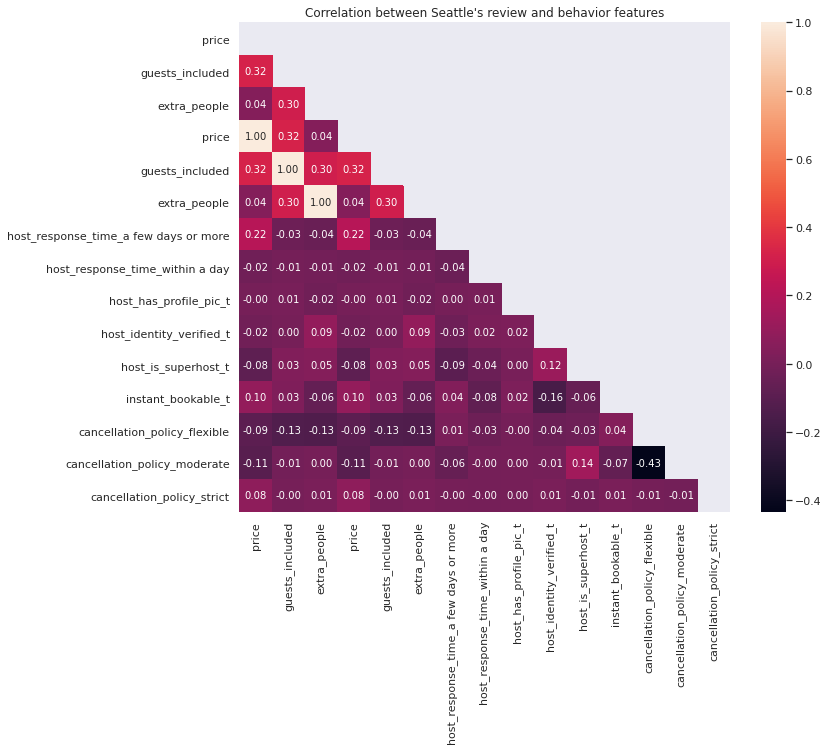

In [42]:
corr = seattle_merged.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.rcParams['figure.figsize'] = [11, 9]
sns.heatmap(corr, mask=mask, annot = True, fmt='.2f')
plt.title(label= "Correlation between Seattle's review and behavior features", fontdict=None, loc='center', pad=None)

Text(0.5, 1.0, "Correlation between Boston's review and behavior features")

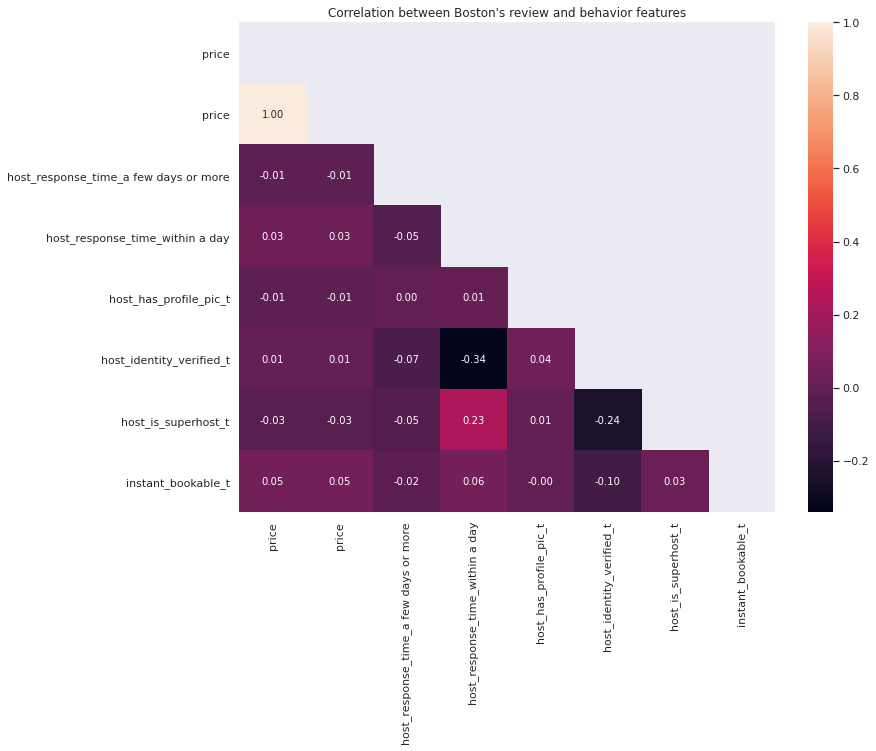

In [43]:
corr = boston_merged.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
plt.rcParams['figure.figsize'] = [12, 9]
sns.heatmap(corr, mask=mask, annot = True, fmt='.2f')
plt.rcParams['figure.figsize'] = [12, 9]
plt.title(label= "Correlation between Boston's review and behavior features", fontdict=None, loc='center', pad=None)

In [44]:
def clean_listings_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for detailed airbnb listings 
    dataframe 
    
    INPUT: Listings DataFrame
    OUTPUT: Trimmed and cleaned detailed airbnb listings DataFrame
    """
    # drop neighbourhood column since it is redundent 
    try:
        df.drop(columns = 'neighbourhood' , inplace = True, axis = 1)
    except:
        pass
    
    # drop columns with more than 75% missing values
    cols_with_missing_val = list(set(df.columns[df.isnull().mean()>0.750]))
    df.drop(columns=cols_with_missing_val,inplace=True,axis = 1)
    
    # create new column for existing information regarding transit, description, neighbourhood, host,summary
    df['has_transit_info'] = df['transit'].apply(lambda x: 0 if pd.isnull(x) else 1)
    df['has_description_info'] = df.description.apply(lambda x: 0 if pd.isnull(x) else 1)
    df['has_summary_info'] = df.summary.apply(lambda x: 0 if pd.isnull(x) else 1)
    df['has_neighborhood_info'] = df.neighborhood_overview.apply(lambda x: 0 if pd.isnull(x) else 1)
    df['has_host_info'] = df.host_about.apply(lambda x: 0 if pd.isnull(x) else 1)
    df.host_is_superhost = df.host_is_superhost.apply(lambda x: 0 if pd.isnull(x) else 1)

    # convert columns containing t and f into binary columns 
    df['instant_bookable'] =  df['instant_bookable'].apply(lambda x: 1 if x=='t' else 0)
    df['require_guest_phone_verification'] =  df['require_guest_phone_verification'].apply(lambda x: 1 if x=='t' else 0)
    df['require_guest_profile_picture'] =  df['require_guest_profile_picture'].apply(lambda x: 1 if x=='t' else 0)
    df['host_identity_verified'] =  df['host_identity_verified'].apply(lambda x: 1 if x=='t' else 0)
    df.host_has_profile_pic = df.host_has_profile_pic.apply(lambda x: 1 if x=='t' else 0)

    # Drop  irrelant or redundent columns
    columns_to_drop = ['id','listing_url', 'scrape_id', 'license','last_scraped','calendar_last_scraped', 'country_code', 'country', 'picture_url', 'host_url', 'host_thumbnail_url','notes', 
    'host_picture_url','transit', 'space', 'description', 'summary', 'neighborhood_overview', 'name', 'latitude', 'longitude'
    , 'is_location_exact', 'host_about','is_business_travel_ready','jurisdiction_names','experiences_offered','access', 'interaction', 
    'house_rules', 'amenities','calendar_last_scraped','requires_license', 'smart_location','first_review','last_review','host_since', 'host_verifications', 'street',
    'host_verifications', 'calendar_updated','has_availability', 'city', 'state','host_id','zipcode','market','host_location','host_name','host_neighbourhood']

    df.drop(columns=columns_to_drop, inplace=True)
    
    # fix columns datatypes
    

    #fix the host_response rate to int instead of string
    df.host_response_rate = df.host_response_rate.apply(lambda x: clean_response_rate(x))

    #Handling categorical Variables
    cat_cols_lst = df.select_dtypes(include=['object'])
    
    df = create_dummy_df(df, cat_cols_lst, dummy_na=False) 
    
    # drop rows with missing values
    df.dropna(inplace = True)
    
    # delete the columns with only one value 
    df = drop_constant_column(df)
    return df


def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in cat_cols:
        try:
            df = pd.concat([df.drop(col, axis =1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df


def clean_response_rate(x):
    """
    clean the response rate column by eliminating the % and
    from the string and return a float to be stored in the column
    """
    try:
        return float(str( x[:-1]))/100
    except:
        return x

def drop_constant_column(dataframe):
    """
    Drops constant value columns of pandas dataframe.
    """
    return dataframe.loc[:, (dataframe != dataframe.iloc[0]).any()]

In [45]:
seattle_cleaned = clean_listings_data(df_seattle_listings)
seattle_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3519 entries, 0 to 6529
Columns: 244 entries, host_response_rate to cancellation_policy_super_strict_60
dtypes: float64(20), int64(28), uint8(196)
memory usage: 2.0 MB


In [46]:
def boston_clean(df):
    """
    Perform feature trimming, re-encoding, and engineering for detailed airbnb listings 
    dataframe 
    
    INPUT: Listings DataFrame
    OUTPUT: Trimmed and cleaned detailed airbnb listings DataFrame
    """
    # drop neighbourhood column since it is redundent 
    
    # drop columns with more than 75% missing values
    cols_with_missing_val = list(set(df.columns[df.isnull().mean()>0.750]))
    df.drop(columns=cols_with_missing_val,inplace=True,axis = 1)
    
    # create new column for existing information regarding transit, description, neighbourhood, host,summary
    df['has_description_info'] = df.description.apply(lambda x: 0 if pd.isnull(x) else 1)
    df['has_neighborhood_info'] = df.neighborhood_overview.apply(lambda x: 0 if pd.isnull(x) else 1)
    df['has_host_info'] = df.host_about.apply(lambda x: 0 if pd.isnull(x) else 1)
    df.host_is_superhost = df.host_is_superhost.apply(lambda x: 0 if pd.isnull(x) else 1)
    # convert columns containing t and f into binary columns 
    df['instant_bookable'] =  df['instant_bookable'].apply(lambda x: 1 if x=='t' else 0)
    df['host_identity_verified'] =  df['host_identity_verified'].apply(lambda x: 1 if x=='t' else 0)
    df.host_has_profile_pic = df.host_has_profile_pic.apply(lambda x: 1 if x=='t' else 0)

    # Drop  irrelant or redundent columns
    columns_to_drop = ['id','listing_url', 'scrape_id', 'last_scraped', 'picture_url', 'host_url', 'host_thumbnail_url',
    'host_picture_url', 'description', 'neighborhood_overview', 'name', 'latitude', 'longitude','calendar_last_scraped'
    , 'host_about', 'amenities', 'host_verifications','license','last_review','first_review','host_since',
    'host_verifications','has_availability','host_id','host_location','host_name','host_neighbourhood']

    df.drop(columns=columns_to_drop, inplace=True)
    
    # fix columns datatypes
    #fix the host_response rate to int instead of string
    df.host_response_rate = df.host_response_rate.apply(lambda x: clean_response_rate(x))

    #Handling categorical Variables
    cat_cols_lst = df.select_dtypes(include=['object'])
    
    df = create_dummy_df(df, cat_cols_lst, dummy_na=False) 
    
    # drop rows with missing values
    df.dropna(inplace = True)
    
    # delete the columns with only one value 
    df = drop_constant_column(df)
    return df

In [47]:
boston_cleaned = boston_clean(df_boston_listings)
boston_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1705 entries, 0 to 3183
Columns: 199 entries, host_response_rate to bathrooms_text_Shared half-bath
dtypes: float64(18), int64(22), uint8(159)
memory usage: 810.9 KB


In [48]:
# Rearrange the col for Features Scaling
cols = list(seattle_cleaned.columns.values)
cols.pop(cols.index('price')) #Remove b from list
dataset_seattle = seattle_cleaned[cols+['price']] 

In [49]:
# Rearrange the col for Features Scaling
cols = list(boston_cleaned.columns.values)
cols.pop(cols.index('price')) #Remove b from list
dataset_boston = boston_cleaned[cols+['price']] 

In [50]:
X_boston = dataset_boston.iloc[:,:-1]
boston_col = X_boston.columns
y_boston = dataset_boston.iloc[:, -1]
X_seattle = dataset_seattle.iloc[:,:-1]
seattle_col = X_seattle.columns
y_seattle = dataset_seattle.iloc[:,-1]

#### Using Features Scaling 

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_boston = sc.fit_transform(X_boston)
X_seattle = sc.fit_transform(X_seattle)

##### Splitting the dataset into the Training set and Test set

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size = 0.33, random_state = 0)

In [53]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math

In [54]:
%%time
classifier = RandomForestRegressor(n_estimators=1000, max_depth=30, criterion='mse', random_state=0);
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

CPU times: user 19.7 s, sys: 36.2 ms, total: 19.8 s
Wall time: 19.8 s


In [55]:
print(math.sqrt(mean_squared_error(y_test, y_pred)))

91.14575052432889


In [56]:
def custom_metric(y_test, y_pred):
    '''Create custom metric that returns r-squared score
       
       Parameters: 
         y_test:target values
         y_pred:estimated target values
       
       Returns: A regression score generally between 0-1
       It is a difference between target values and estimated target values
    '''
    r2 = r2_score(y_test, y_pred)
    return r2

In [57]:
score5 = make_scorer(custom_metric, greater_is_better=True)

In [58]:
score5(classifier, X_test, y_test) 

0.6765774377679685

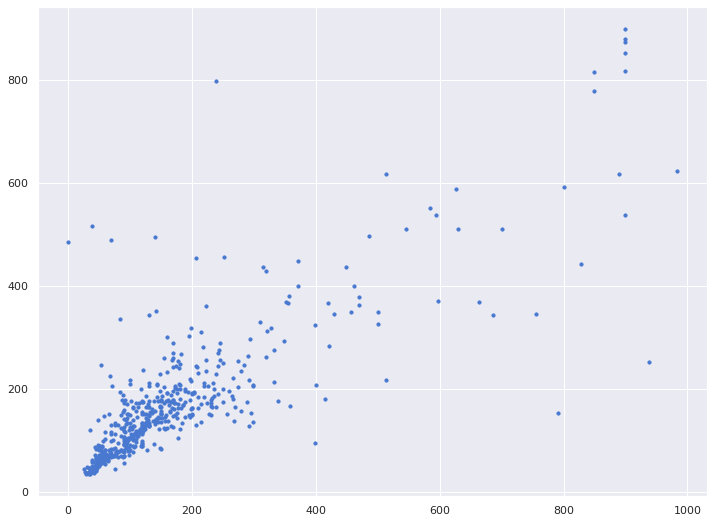

In [59]:
plt.scatter(y_test, y_pred, 10)

In [60]:
importances = list(zip(classifier.feature_importances_, boston_col))
importances.sort(reverse=True)

In [61]:
top_6 = importances[:6]

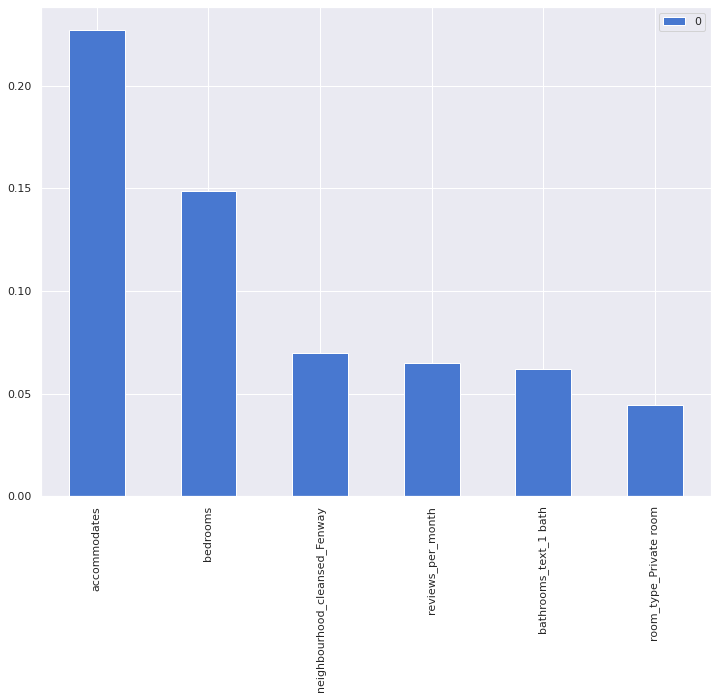

In [62]:
pd.DataFrame(top_6, index=[x for (_,x) in top_6]).plot(kind = 'bar')

### Seattle

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_seattle, y_seattle, test_size = 0.33, random_state = 0)

In [64]:
%%time
classifier = RandomForestRegressor(n_estimators=1000, max_depth=30, criterion='mse', random_state=0);
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

CPU times: user 56.1 s, sys: 23.3 ms, total: 56.2 s
Wall time: 56.2 s


In [65]:
print(math.sqrt(mean_squared_error(y_test, y_pred)))

71.95750665614186


In [66]:
score5 = make_scorer(custom_metric, greater_is_better=True)

In [67]:
score5(classifier, X_test, y_test) 

0.7624628345894058

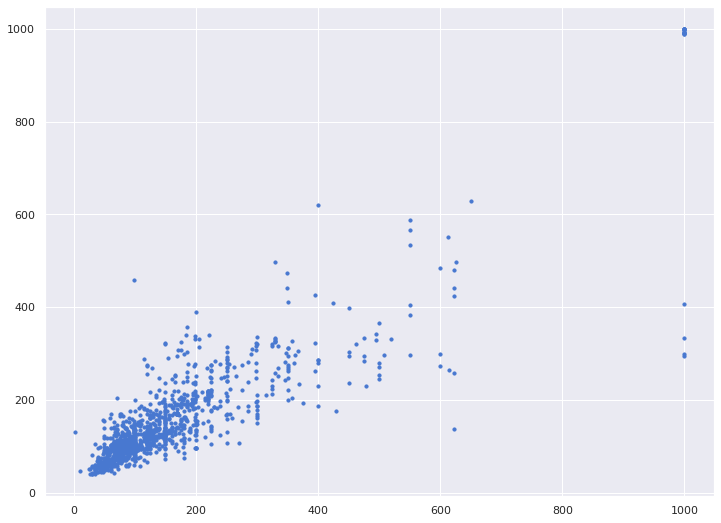

In [68]:
plt.scatter(y_test, y_pred, 10)

In [69]:
importances = list(zip(classifier.feature_importances_, seattle_col))
importances.sort(reverse=True)

In [70]:
top_6 = importances[:6]

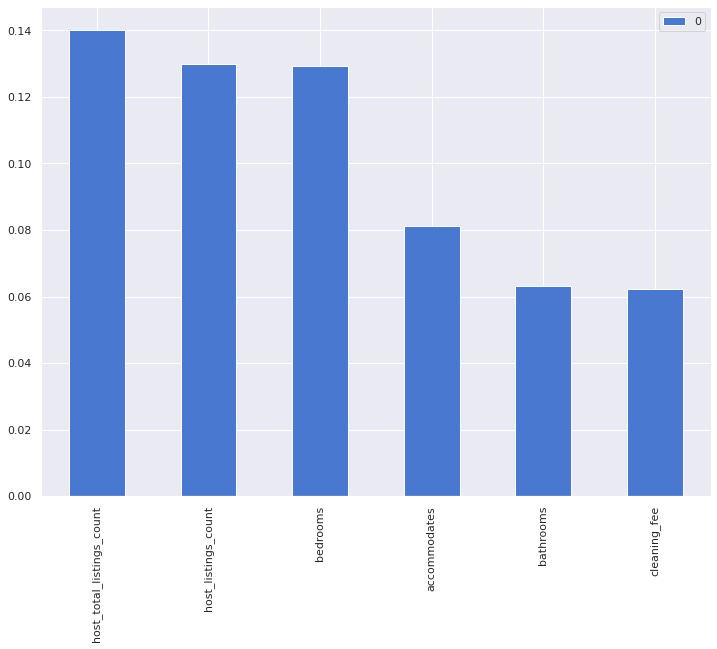

In [71]:
pd.DataFrame(top_6, index=[x for (_,x) in top_6]).plot(kind = 'bar')

### Reviews

In [26]:
host_reviews_boston = reviews_details_boston.groupby(['host_id', 'host_name']).size().sort_values(ascending=False).to_frame(name = "number_of_reviews")
host_reviews_boston.head()

number_of_reviews
host_id  host_name                       
22348222 Maverick                    6457
9410008  Jason                       3039
69587    Boris & Susan               2963
814298   Thatch                      2151
12243051 Sonder                      1986

In [30]:
host_reviews_boston = host_reviews_boston[:10]

In [38]:
top_10_boston = host_reviews_boston.reset_index()
top_10_boston.drop(columns=['host_id'],inplace=True)
top_10_boston.set_index('host_name',inplace=True)

In [54]:
host_reviews_seattle = reviews_details_seattle.groupby(['host_id', 'host_name']).size().sort_values(ascending=False).to_frame(name = "number_of_reviews")
host_reviews_seattle.head()

number_of_reviews
host_id   host_name                   
229095817 Loftium                 3371
20493911  Kevin                   2395
15984289  Julian                  2133
5325329   Blair                   2096
4730169   Magic                   1866

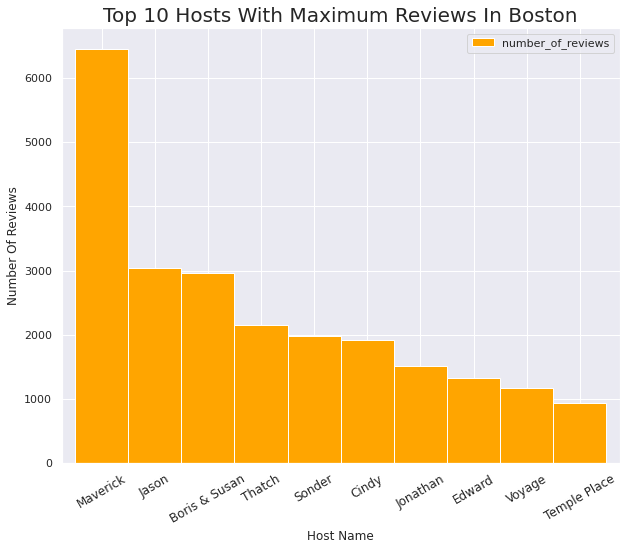

In [53]:
top_10_boston.plot.bar(figsize=(10,8), width=1, rot=1,color='orange')
plt.title('Top 10 Hosts With Maximum Reviews In Boston', fontsize=20)
plt.ylabel('Number Of Reviews', fontsize=12)
plt.xlabel('Host Name', fontsize=12)
plt.xticks(rotation=30,fontsize=12)
plt.show()

In [55]:
host_reviews_seattle = host_reviews_seattle[:10]

In [57]:
top_10_seattle = host_reviews_seattle.reset_index()
top_10_seattle.drop(columns=['host_id'],inplace=True)
top_10_seattle.set_index('host_name',inplace=True)

In [58]:
top_10_seattle

number_of_reviews
host_name                       
Loftium                     3371
Kevin                       2395
Julian                      2133
Blair                       2096
Magic                       1866
Ella                        1621
Seattle Oasis               1613
Rob                         1554
Louis & Kevin               1519
Michael                     1440

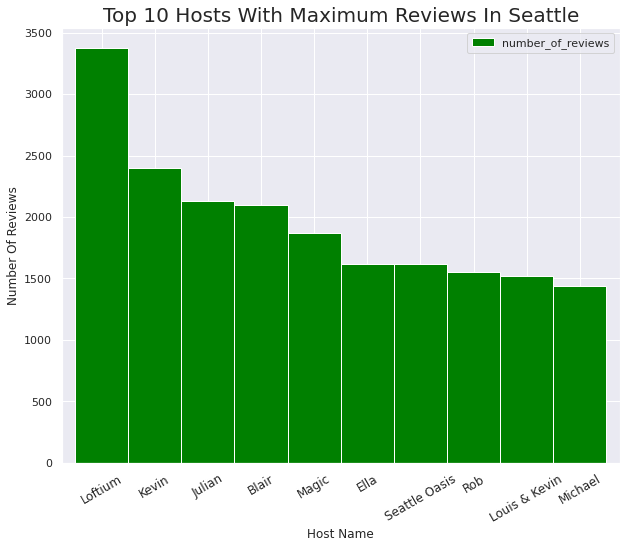

In [69]:
top_10_seattle.plot.bar(figsize=(10,8), width=1, rot=1,color='green')
plt.title('Top 10 Hosts With Maximum Reviews In Seattle', fontsize=20)
plt.ylabel('Number Of Reviews', fontsize=12)
plt.xlabel('Host Name', fontsize=12)
plt.xticks(rotation=30,fontsize=12)
plt.show()

In [70]:
from sklearn.feature_extraction import stop_words
from sklearn import decomposition
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy import linalg
import re

In [71]:
replace_puncts = {'`': "'", '′': "'", '“':'"', '”': '"', '‘': "'"}

strip_chars = [',', '.', '"', ':', ')', '(', '-', '|', ';', "'", '[', ']', '>', '=', '+', '\\', '•',  '~', '@', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

puncts = ['!', '?', '$', '&', '/', '%', '#', '*','£']

def clean_str(x):
    x = str(x)
    
    x = x.lower()
    
    x = re.sub(r"(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9]\.[^\s]{2,})", "url", x)
    
    for k, v in replace_puncts.items():
        x = x.replace(k, f' {v} ')
        
    for punct in strip_chars:
        x = x.replace(punct, ' ') 
    
    for punct in puncts:
        x = x.replace(punct, f' {punct} ')
        
    x = x.replace(" '", " ")
    x = x.replace("' ", " ")
        
    return x

In [72]:
reviews_details_boston['cleaned_comments'] = reviews_details_boston['comments'].apply(clean_str)

In [73]:
reviews_details_boston.dropna(subset=['cleaned_comments'],inplace=True)

In [74]:
reviews_details_boston.shape

(126851, 9)

In [75]:
reviews_details_boston = reviews_details_boston[:1000]

In [76]:
%time 
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(reviews_details_boston.comments).todense() 
U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 6.68 µs


In [77]:
vocab = np.array(vectorizer.get_feature_names())

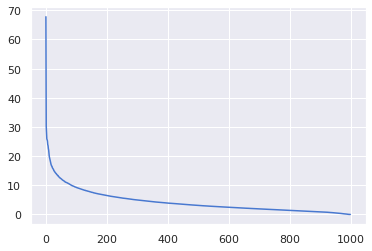

In [78]:
plt.plot(s)

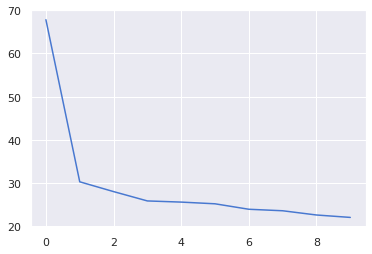

In [79]:
plt.plot(s[:10])

In [80]:
num_top_words=5
def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [81]:
show_topics(Vh[:10])

['해주거나 出行方便 зоной из квартира',
 'great apartment location atef boat',
 'great michelle boston stay boat',
 'elizabeth place stay suite boston',
 'apartment boston michelle stay boat',
 'stay place terry michelle great',
 'elizabeth suite michelle nice good',
 'apartment michelle great place boston',
 'check boston boat house company',
 'stay house robert apartment check']

In [82]:
reviews_details_boston['cleaned_comments'] = reviews_details_boston['comments'].apply(clean_str)

In [83]:
reviews_details_boston.dropna(subset=['cleaned_comments'],inplace=True)

In [84]:
reviews_details_seattle = reviews_details_seattle[:1000]

In [86]:
reviews_details_seattle['cleaned_comments'] = reviews_details_seattle['comments'].apply(clean_str)

<ipython-input-86-72df4de7cc4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_details_seattle['cleaned_comments'] = reviews_details_seattle['comments'].apply(clean_str)


In [87]:
vectors = vectorizer.fit_transform(reviews_details_seattle.cleaned_comments).todense() 
U, s, Vh = linalg.svd(vectors, full_matrices=False)

In [88]:
show_topics(Vh[:10])

['temp tea tasteful tastefull tastefully',
 'petite ahh exit lies adequate',
 'faithful il mini defiantly blue',
 'batteries fuzzy faithful petite funky',
 'faithful fuzzy hanging leuven exit',
 'portuguese mini fuzzy il lies',
 'batteries portuguese friend exit defiantly',
 'friend lies brigham champagne alles',
 'mini il friend pero hanging',
 'il defiantly replace carying holiday']

In [89]:
def preprocessor_final(text):
    if isinstance((text), (str)):
        text = re.sub('<[^>]*>', ' ', text)
        text = re.sub('[\W]+', ' ', text.lower())
        return text
    if isinstance((text), (list)):
        return_list = []
        for i in range(len(text)):
            temp_text = re.sub('<[^>]*>', ' ', text[i])
            temp_text = re.sub('[\W]+', ' ', temp_text.lower())
            return_list.append(temp_text)
        return(return_list)
    else:
        pass

def get_lan(text):
    doc = nlp(text)
    if doc._.language['language']=="en":
        return 1
    else:
        return 0

In [90]:
import spacy
from spacy_langdetect import LanguageDetector
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe(LanguageDetector(), name='language_detector', last=True)

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA


def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic #{topic_idx+1}:")
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

        
reviews_details_seattle['cleaned_text']= reviews_details_seattle.comments.apply(lambda x:preprocessor_final(x))
reviews_details_seattle['lan'] = reviews_details_seattle['cleaned_text'].apply(lambda x:get_lan(x))
reviews_details_seattle = reviews_details_seattle[reviews_details_seattle['lan'] ==1]
# Create TF-IDF vectors from unigrams
count_vectorizer = TfidfVectorizer(
                        strip_accents='unicode',
                        preprocessor=None,
                        stop_words="english",
                        analyzer='word',
                        ngram_range=(1, 1),
                        use_idf=True, smooth_idf=True, 
                        max_features = 5000)

count_vectorizer.fit(reviews_details_seattle['cleaned_text'])

# LDA
number_topics = 5
number_words = 2

bag_of_words = count_vectorizer.transform(reviews_details_seattle['cleaned_text'])

# Create and fit the LDA model
lda = LDA(n_components=number_topics, random_state=19, n_jobs=-1, learning_method='online')
lda.fit(bag_of_words)

print_topics(lda, count_vectorizer, number_words)

<ipython-input-91-1d8a5227a77a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_details_seattle['cleaned_text']= reviews_details_seattle.comments.apply(lambda x:preprocessor_final(x))



Topic #1:
nit unfortunate

Topic #2:
facility break

Topic #3:
bella vitale

Topic #4:
automated posting

Topic #5:
great place


In [93]:
reviews_details_boston['cleaned_text']= reviews_details_boston.comments.apply(lambda x:preprocessor_final(x))
reviews_details_boston['lan'] = reviews_details_boston['cleaned_text'].apply(lambda x:get_lan(x))
reviews_details_boston = reviews_details_boston[reviews_details_boston['lan'] ==1]
# Create TF-IDF vectors from unigrams
count_vectorizer = TfidfVectorizer(
                        strip_accents='unicode',
                        preprocessor=None,
                        stop_words="english",
                        analyzer='word',
                        ngram_range=(1, 1),
                        use_idf=True, smooth_idf=True, 
                        max_features = 5000)

count_vectorizer.fit(reviews_details_boston['cleaned_text'])

# LDA
number_topics = 5
number_words = 2

bag_of_words = count_vectorizer.transform(reviews_details_boston['cleaned_text'])

# Create and fit the LDA model
lda = LDA(n_components=number_topics, random_state=19, n_jobs=-1, learning_method='online')
lda.fit(bag_of_words)

print_topics(lda, count_vectorizer, number_words)


Topic #1:
disposed plastic

Topic #2:
great stay

Topic #3:
vous offre

Topic #4:
advertises john

Topic #5:
landlady lo
